In [50]:
import pandas as pd
import os
import json
import glob

# 1. 수정된 폴더 경로 설정
# r"..." 문자열을 사용하여 윈도우 경로의 역슬래시(\)를 그대로 인식시킵니다.
path_reddit_x = r"C:\junwoo\AI_Project_01_Team6\data\Commnunity_data"
path_community = r"C:\junwoo\AI_Project_01_Team6\data\Community_data"

print("설정된 경로 확인:")
print(f"1. {path_reddit_x}")
print(f"2. {path_community}")

def load_data_from_folder(folder_path, folder_name):
    """
    특정 폴더에서 CSV와 JSON 파일을 찾아 데이터를 로드하는 함수
    """
    print(f"\n--- [{folder_name}] 폴더 데이터 로딩 중 ---")
    
    # CSV 파일 찾기
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = []
    
    if csv_files:
        for file in csv_files:
            try:
                # 데이터 로드
                df = pd.read_csv(file)
                df_list.append(df)
                print(f"✅ CSV 로드 성공: {os.path.basename(file)} | 크기: {df.shape}")
            except Exception as e:
                print(f"❌ CSV 로드 실패: {os.path.basename(file)} | 에러: {e}")
    else:
        print(f"⚠️ {folder_name} 폴더에 CSV 파일이 없습니다.")

    # JSON 파일 찾기 (메타데이터 확인용)
    json_files = glob.glob(os.path.join(folder_path, "*.json"))
    if json_files:
        for file in json_files:
            try:
                with open(file, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    # total_urls 키가 있다면 출력 (업로드하신 파일 구조 반영)
                    if 'total_urls' in data:
                        print(f"ℹ️ JSON 메타데이터 ({os.path.basename(file)}): 총 URL 수 = {data['total_urls']}")
            except:
                pass

    # 해당 폴더의 모든 CSV 병합
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

# 2. 각 폴더에서 데이터 로드
df_part1 = load_data_from_folder(path_reddit_x, "Reddit_X raw data")
df_part2 = load_data_from_folder(path_community, "Community_data")

# 3. 전체 데이터 통합 및 중복 제거
print("\n" + "="*40)
print("=== 전체 데이터 통합 결과 ===")

# 두 데이터프레임 합치기
all_data = pd.concat([df_part1, df_part2], ignore_index=True)

if not all_data.empty:
    initial_count = len(all_data)
    
    # 'url' 컬럼 기준으로 중복 제거 (동일한 게시글이 중복 수집되었을 경우 대비)
    # subset에 중복 기준 컬럼을 지정합니다. (예: url, title 등)
    if 'url' in all_data.columns:
        all_data_unique = all_data.drop_duplicates(subset=['url'], keep='last')
    else:
        all_data_unique = all_data.drop_duplicates()
        
    final_count = len(all_data_unique)
    
    print(f"총 수집된 데이터 행(Row) 수: {initial_count}")
    print(f"중복 제거 후 유니크 데이터 수: {final_count}")
    print(f"데이터 컬럼(Column) 목록:\n{list(all_data_unique.columns)}")
    
    # 4. 데이터 미리보기
    print("\n=== 데이터 보기 ===")
    display(all_data_unique)
    
    # 5. 플랫폼별 데이터 분포 확인
    if 'platform' in all_data_unique.columns:
        print("\n=== 플랫폼별 수집 개수 ===")

설정된 경로 확인:
1. C:\junwoo\AI_Project_01_Team6\data\Commnunity_data
2. C:\junwoo\AI_Project_01_Team6\data\Community_data

--- [Reddit_X raw data] 폴더 데이터 로딩 중 ---
⚠️ Reddit_X raw data 폴더에 CSV 파일이 없습니다.

--- [Community_data] 폴더 데이터 로딩 중 ---
✅ CSV 로드 성공: 01_SNS_URL_DATABASE.csv | 크기: (88, 11)
✅ CSV 로드 성공: FINAL_10K_RECORDS.csv | 크기: (10000, 14)
✅ CSV 로드 성공: High_Engagement_Records.csv | 크기: (49, 14)
✅ CSV 로드 성공: October_10_Crash_Day.csv | 크기: (369, 14)
✅ CSV 로드 성공: SNS_DATA_EXPANDED_RESULTS.csv | 크기: (986, 7)
✅ CSV 로드 성공: SNS_DEEP_DIVE(1).csv | 크기: (1003, 7)
✅ CSV 로드 성공: SNS_DEEP_DIVE(NoInstall).csv | 크기: (1011, 7)
✅ CSV 로드 성공: SNS_MASTER_URLS_FINAL.csv | 크기: (53, 11)
✅ CSV 로드 성공: TimeSeries_Sorted.csv | 크기: (10000, 14)
ℹ️ JSON 메타데이터 (00_COLLECTION_METADATA.json): 총 URL 수 = 88
ℹ️ JSON 메타데이터 (SNS_COLLECTION_SUMMARY.json): 총 URL 수 = 53

=== 전체 데이터 통합 결과 ===
총 수집된 데이터 행(Row) 수: 23559
중복 제거 후 유니크 데이터 수: 89
데이터 컬럼(Column) 목록:
['platform', 'subreddit', 'url', 'title', 'date_ref', 'theme', 'engagem

platform subreddit  \
53     BitcoinTalk       NaN   
54          Medium       NaN   
55          Medium       NaN   
56          Medium       NaN   
57          Medium       NaN   
...            ...       ...   
13555  X (Twitter)       NaN   
13556  X (Twitter)       NaN   
13557  X (Twitter)       NaN   
13558  X (Twitter)       NaN   
23558         News       NaN   

                                                     url  \
53     https://bitcointalk.org/index.php?topic=5569583.0   
54     https://medium.com/@j.razo7869/the-day-crypto-...   
55     https://medium.com/nolusprotocol/liquidation-i...   
56     https://medium.com/thecapital/the-truth-about-...   
57     https://medium.com/@Lastadam/the-october-2025-...   
...                                                  ...   
13555                      https://x.com/ChathuraVirajW1   
13556                           https://x.com/instelmakh   
13557                             https://x.com/kendude_   
13558                       https://x.com/rahulbhadoriya   
23558                                                NaN   

                                                   title  \
53     List of Key Events of 2025 - October liquidity...   
54     The Day Crypto Fell And Why It Might Have Just...   
55        Liquidation Impacts - $20 billion deleveraging   
56             The Truth About the Current Crypto Market   
57     What Really Happened When Crypto Infrastructur...   
...                                                  ...   
13555    87% liquidations were longs. 1.66M traders rekt   
13556  October liquidation reminded leverage and vola...   
13557       USDe trading at $0.65 marked down collateral   
13558             Ethena $14.98B TVL contracted to $6.6B   
23558  Re: Bitcoin Below $82K - 30% from October 2025...   

                           date_ref                          theme  \
53                     October 2025  Forum discussion - key events   
54                 October 11, 2025          Market reset analysis   
55                 Mid-October 2025         DeFi protocol analysis   
56                 October 10, 2025          Market truth analysis   
57              October 10-11, 2025         Infrastructure failure   
...                             ...                            ...   
13555                  October 2025                   Long squeeze   
13556                  October 2025         Risk management lesson   
13557                  October 2025               Stablecoin depeg   
13558  October 2025 to January 2026                   TVL collapse   
23558                           NaN              Continued decline   

      engagement_est            author collection_date  \
53         Very High         Community      2026-01-30   
54              High       @j.razo7869      2026-01-30   
55              High    Nolus Protocol      2026-01-30   
56         Very High      Ben Fairbank      2026-01-30   
57         Very High         @Lastadam      2026-01-30   
...              ...               ...             ...   
13555      Very High  @ChathuraVirajW1      2026-01-30   
13556         Medium       @instelmakh      2026-01-30   
13557           High         @kendude_      2026-01-30   
13558           High   @rahulbhadoriya      2026-01-30   
23558            NaN               NaN             NaN   

                                data_source  ...  \
53     Firecrawl Search - Massive Expansion  ...   
54     Firecrawl Search - Massive Expansion  ...   
55     Firecrawl Search - Massive Expansion  ...   
56     Firecrawl Search - Massive Expansion  ...   
57     Firecrawl Search - Massive Expansion  ...   
...                                     ...  ...   
13555              Firecrawl Search - Final  ...   
13556              Firecrawl Search - Final  ...   
13557              Firecrawl Search - Final  ...   
13558              Firecrawl Search - Final  ...   
23558                                   NaN  ...   

                    


=== 플랫폼별 수집 개수 ===


In [51]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import json
import re
from urllib.parse import urlparse

# ==========================================
# 1. 설정 및 데이터 로드
# ==========================================
# 사용자 경로 (이전에 합친 파일이 있다고 가정, 없으면 다시 로드 로직 사용)
# 여기서는 예시로 로드된 df를 가정하거나, 파일 경로를 지정하세요.
# df = pd.read_csv('combined_url_data.csv') # 앞 단계에서 만든 파일

# (테스트를 위해 앞선 코드의 결과를 그대로 쓴다고 가정합니다)
# 만약 앞 셀의 'all_data_unique' 변수가 살아있다면 그걸 쓰시고, 아니면 아래 경로를 수정하세요.
input_csv_path = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\SNS_MASTER_URLS_FINAL.csv" # 예시

try:
    df = pd.read_csv(input_csv_path)
    # 중복 제거
    df = df.drop_duplicates(subset=['url'], keep='last')
    print(f"🎯 분석 대상 URL: {len(df)}개")
except:
    print("CSV 파일을 찾을 수 없어 빈 프레임으로 시작합니다 (경로 확인 필요)")
    df = pd.DataFrame(columns=['platform', 'url', 'title'])

# 수집된 데이터를 저장할 리스트
expanded_dataset = []

# ==========================================
# 2. 핵심 로직: 플랫폼별 추출기 (Extractors)
# ==========================================

# [헤더 설정] 봇 차단 방지용 User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

def extract_reddit_deep(row):
    """
    Reddit JSON 트릭 사용: API Key 없이 .json을 URL 뒤에 붙여 구조화된 데이터(본문+댓글)를 가져옴.
    가장 강력한 데이터 증폭 구간.
    """
    url = row['url']
    if not url.endswith('/'):
        url += '/'
    json_url = url + ".json"
    
    print(f"   Trying Reddit JSON: {json_url}")
    
    try:
        r = requests.get(json_url, headers=headers, timeout=10)
        if r.status_code != 200:
            return 0
            
        data = r.json()
        count = 0
        
        # 1. 본문 (Original Post)
        post_data = data[0]['data']['children'][0]['data']
        expanded_dataset.append({
            'parent_url': row['url'],
            'platform': 'Reddit',
            'type': 'Post',
            'author': post_data.get('author', 'unknown'),
            'content': post_data.get('selftext', '') or post_data.get('title', ''),
            'date_utc': post_data.get('created_utc', ''),
            'score': post_data.get('score', 0)
        })
        count += 1
        
        # 2. 댓글 (Comments) - 재귀적으로 파싱할 수도 있지만 여기선 1 depth만 강력하게 수집
        comments_data = data[1]['data']['children']
        for comment in comments_data:
            c_data = comment.get('data', {})
            body = c_data.get('body', '')
            
            if body and body != '[deleted]':
                expanded_dataset.append({
                    'parent_url': row['url'],
                    'platform': 'Reddit',
                    'type': 'Comment',
                    'author': c_data.get('author', 'unknown'),
                    'content': body,
                    'date_utc': c_data.get('created_utc', ''),
                    'score': c_data.get('score', 0)
                })
                count += 1
                
        return count
    except Exception as e:
        print(f"   Error Reddit: {e}")
        return 0

def extract_general_web(row):
    """
    News, Medium 등 일반 웹사이트 본문 추출 (BeautifulSoup)
    """
    url = row['url']
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        # 제목
        title = soup.title.string if soup.title else row.get('title', '')
        
        # 본문 (P 태그 위주)
        paragraphs = soup.find_all('p')
        full_text = " ".join([p.get_text() for p in paragraphs if len(p.get_text()) > 20])
        
        if len(full_text) > 50:
            expanded_dataset.append({
                'parent_url': url,
                'platform': row.get('platform', 'Web'),
                'type': 'Article_Body',
                'author': row.get('author', 'unknown'),
                'content': full_text,
                'date_utc': 'Check Original',
                'score': 0
            })
            return 1
        return 0
    except Exception as e:
        return 0

# ==========================================
# 3. 실행 루프 (Execution Loop)
# ==========================================

print("🚀 데이터 딥 다이브(Deep Dive) 시작...")
print("주의: 이 작업은 시간이 소요됩니다. (URL당 1~2초)")

total_new_records = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    print(f"[{idx+1}/{len(df)}] Processing: {platform} - {url[:40]}...")
    
    added_count = 0
    
    # 1. Reddit 처리 (가장 확실한 물량)
    if 'reddit' in platform or 'reddit.com' in url:
        added_count = extract_reddit_deep(row)
        
    # 2. X (Twitter) 처리
    # 주의: Twitter는 Selenium 없이는 스크래핑이 매우 어렵습니다. 
    # API 키 없이는 requests로 불가. 여기서는 'URL 정보'만이라도 확실히 포맷팅해둡니다.
    elif 'twitter' in platform or 'x.com' in url:
        # 트위터는 내용 접근이 제한적이므로 원본 타이틀을 데이터로 확보
        expanded_dataset.append({
            'parent_url': url,
            'platform': 'X (Twitter)',
            'type': 'Post_Summary',
            'author': row.get('author', 'unknown'),
            'content': row.get('title', 'Content Protected'), # 제목을 내용으로 사용
            'date_utc': row.get('date_ref', ''),
            'score': 0
        })
        added_count = 1
        
    # 3. 기타 웹 (News, Medium)
    else:
        added_count = extract_general_web(row)
        
    total_new_records += added_count
    
    # 서버 부하 방지용 딜레이
    time.sleep(random.uniform(0.5, 1.5))

# ==========================================
# 4. 결과 저장 및 확인
# ==========================================

df_expanded = pd.DataFrame(expanded_dataset)

print("\n" + "="*40)
print(f"✨ 추출 완료! 총 {total_new_records}개의 상세 데이터 확보")
print("="*40)

if not df_expanded.empty:
    print(df_expanded['platform'].value_counts())
    
    # CSV 저장
    output_name = "SNS_DATA_EXPANDED_RESULTS.csv"
    df_expanded.to_csv(output_name, index=False, encoding='utf-8-sig')
    print(f"\n📂 파일 저장 완료: {output_name}")
    
    # 미리보기
    display(df_expanded.head())
else:
    print("데이터 추출 실패. 인터넷 연결이나 URL을 확인해주세요.")

🎯 분석 대상 URL: 53개
🚀 데이터 딥 다이브(Deep Dive) 시작...
주의: 이 작업은 시간이 소요됩니다. (URL당 1~2초)
[1/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1qi6689/500m_liquidated_overnight_when_did_we_normalize/.json
[2/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1o3ishj/does_anyone_know_how_historic_this_crash_was/.json
[3/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1ok2hxm/bitcoin_risks_2030_drop_as_crypto_markets/.json
[4/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1q4v6jh/344430000_in_short_positions_has_been_liquidated/.json
[5/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://ww

parent_url platform     type  \
0  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit     Post   
1  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
2  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
3  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
4  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   

                author                                            content  \
0               reogin  Woke up this morning, opened crypto Twitter — ...   
1  Revolutionary-Cup78  Have you seen the amount of leveraged degenin ...   
2           JakRenden2                               Gamblers be gambling   
3              kobriks                                            AI slop   
4             DubT1484  What percentage of traders are profitable?\n\n...   

       date_utc  score  
0  1768927473.0     48  
1  1769041958.0      1  
2  1768986430.0      1  
3  1768984469.0      1  
4  1768972865.0      2

In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import json
import os

# ==========================================
# 1. 경로 설정 (입력 및 출력)
# ==========================================

# 원본 데이터 경로
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

# [중요] 결과물을 저장할 폴더 및 파일명
output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(1).csv"
output_full_path = os.path.join(output_folder, output_filename)

# 폴더 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드 및 병합
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1):
        dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2):
        dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        full_df = full_df.drop_duplicates(subset=['url'], keep='last')
        return full_df
    else:
        return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 확장된 데이터를 담을 리스트
expanded_data = []

# ==========================================
# 3. 크롤링 엔진 (Deep Dive Engine)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

def get_reddit_comments(row):
    """Reddit JSON 트릭: 댓글 폭포수 수집"""
    url = row['url']
    json_url = url.rstrip('/') + ".json"
        
    try:
        time.sleep(random.uniform(0.3, 0.7)) # 속도 약간 상향
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200:
            return 0
            
        data = resp.json()
        count = 0
        
        # 1. 본문 (Original Post)
        try:
            post = data[0]['data']['children'][0]['data']
            expanded_data.append({
                'source_url': url,
                'platform': 'Reddit',
                'type': 'Post',
                'author': post.get('author', 'unknown'),
                'content': post.get('selftext', '') or post.get('title', ''),
                'date_raw': post.get('created_utc', ''),
                'engagement': post.get('score', 0)
            })
            count += 1
        except:
            pass

        # 2. 댓글 (Comments) - 데이터의 바다
        if len(data) > 1:
            comments = data[1]['data']['children']
            for c in comments:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url,
                        'platform': 'Reddit',
                        'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date_raw': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

def get_general_content(row):
    """일반 웹사이트 본문 추출"""
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        paragraphs = soup.find_all('p')
        content = " ".join([p.get_text().strip() for p in paragraphs if len(p.get_text()) > 20])
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url,
                'platform': row.get('platform', 'Web'),
                'type': 'Article',
                'author': row.get('author', 'unknown'),
                'content': content,
                'date_raw': row.get('date_ref', ''),
                'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 실시간 출력
# ==========================================
print("\n💰 데이터 채굴 시작! (100억 개의 지폐 뭉치가 쏟아지듯 데이터가 모입니다...)")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_comments(row)
    elif 'twitter' in platform or 'x.com' in url:
        expanded_data.append({
            'source_url': url,
            'platform': 'X (Twitter)',
            'type': 'Post_Summary',
            'author': row.get('author', ''),
            'content': row.get('title', ''),
            'date_raw': row.get('date_ref', ''),
            'engagement': 0
        })
        cnt = 1
    else:
        cnt = get_general_content(row)
    
    total_count += cnt
    # 진행 상황을 한 줄로 덮어쓰며 출력 (깔끔하게)
    print(f"\r🚀 진행률 [{idx+1}/{len(df)}] | 현재 확보된 데이터: {total_count}개 | 방금 처리: {platform}", end="")

print("\n\n" + "="*60)
print(f"🌊 [완료] 100억 개의 지폐 뭉치처럼 데이터가 쏟아졌습니다!")
print(f"📊 최종 확보된 데이터 총 개수: {total_count} 건")
print("="*60)

# ==========================================
# 5. 저장 및 결과 즉시 출력
# ==========================================
final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    # 1. 파일 저장
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"\n💾 파일 저장 완료: {output_full_path}")
    
    # 2. 데이터 정보 출력
    print("\n[데이터셋 정보]")
    final_df.info()
    
    # 3. 플랫폼별 분포
    print("\n[플랫폼별 데이터 수]")
    print(final_df['platform'].value_counts())
    
    # 4. 실제 데이터 내용 미리보기 (상위 5개)
    print("\n👀 [데이터 미리보기 - Head]")
    display(final_df.head())
    
    # 5. 무작위 샘플 출력 (내용 확인용)
    print("\n🎲 [무작위 샘플 데이터 3개 - 실제 텍스트 내용]")
    try:
        sample_df = final_df.sample(3)
        for i, (idx, row) in enumerate(sample_df.iterrows()):
            print(f"\n--- Sample {i+1} ({row['platform']} / {row['type']}) ---")
            print(f"작성자: {row['author']}")
            print(f"내용: {str(row['content'])[:200]}...") # 내용이 길면 200자에서 자름
    except:
        pass
        
else:
    print("❌ 수집된 데이터가 없습니다. URL 상태나 네트워크를 확인해주세요.")

🎯 [준비 완료] 분석 대상 URL: 88개

💰 데이터 채굴 시작! (100억 개의 지폐 뭉치가 쏟아지듯 데이터가 모입니다...)
🚀 진행률 [141/88] | 현재 확보된 데이터: 996개 | 방금 처리: newsubekalk

🌊 [완료] 100억 개의 지폐 뭉치처럼 데이터가 쏟아졌습니다!
📊 최종 확보된 데이터 총 개수: 996 건

💾 파일 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(1).csv

[데이터셋 정보]
<class 'pandas.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   source_url  996 non-null    str   
 1   platform    996 non-null    str   
 2   type        996 non-null    str   
 3   author      996 non-null    str   
 4   content     996 non-null    str   
 5   date_raw    996 non-null    object
 6   engagement  996 non-null    int64 
dtypes: int64(1), object(1), str(5)
memory usage: 54.6+ KB

[플랫폼별 데이터 수]
platform
Reddit         950
X (Twitter)     34
Substack         6
News             6
Name: count, dtype: int64

👀 [데이터 미리보기 - Head]


source_url platform     type  \
0  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit     Post   
1  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
2  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
3  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
4  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   

                author                                            content  \
0               reogin  Woke up this morning, opened crypto Twitter — ...   
1  Revolutionary-Cup78  Have you seen the amount of leveraged degenin ...   
2           JakRenden2                               Gamblers be gambling   
3              kobriks                                            AI slop   
4             DubT1484  What percentage of traders are profitable?\n\n...   

       date_raw  engagement  
0  1768927473.0          48  
1  1769041958.0           1  
2  1768986430.0           1  
3  1768984469.0           1  
4  1768972865.0           2


🎲 [무작위 샘플 데이터 3개 - 실제 텍스트 내용]

--- Sample 1 (Reddit / Comment) ---
작성자: kingjoeg
내용: I’m going to sleep now, and you all better not crash the market while I’m asleep. Don’t even think about it...

--- Sample 2 (Reddit / Comment) ---
작성자: Grunchie
내용: Its expected at this point. Everyone knows its the bear point in the cycle....

--- Sample 3 (Reddit / Comment) ---
작성자: BoobindarPussia_
내용: Rookie numbers...


In [53]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import os
import json
import re

# ==========================================
# 1. 경로 설정 (입력/출력)
# ==========================================
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(NoInstall).csv"
output_full_path = os.path.join(output_folder, output_filename)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1): dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2): dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        return full_df.drop_duplicates(subset=['url'], keep='last')
    return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 데이터 저장소
expanded_data = []

# ==========================================
# 3. 설치 불필요 크롤링 엔진 (Pure Python)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# --- 1. Reddit (JSON Trick: 설치 없이 댓글 100개 긁기) ---
def get_reddit_pure(row):
    url = row['url']
    json_url = url.rstrip('/') + ".json"
    
    try:
        time.sleep(random.uniform(0.5, 1.0))
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200: return 0
        data = resp.json()
        count = 0
        
        # 본문
        post = data[0]['data']['children'][0]['data']
        expanded_data.append({
            'source_url': url, 'platform': 'Reddit', 'type': 'Post',
            'author': post.get('author', 'unknown'),
            'content': post.get('selftext', '') or post.get('title', ''),
            'date': post.get('created_utc', ''), 'engagement': post.get('score', 0)
        })
        count += 1
        
        # 댓글 (여기가 핵심)
        if len(data) > 1:
            for c in data[1]['data']['children']:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url, 'platform': 'Reddit', 'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

# --- 2. YouTube (Title & Meta: API 없이 HTML 파싱) ---
def get_youtube_pure(row):
    # YouTube 댓글은 동적이라 requests로는 어렵습니다.
    # 대신 영상 설명(Description)과 제목을 확실하게 긁어옵니다.
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        title = soup.find('title').get_text() if soup.find('title') else row.get('title', '')
        # 메타 태그에서 설명 가져오기
        desc = soup.find('meta', attrs={'name': 'description'})
        content = desc['content'] if desc else title
        
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': content,
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1
    except:
        # 실패 시 기본 정보만 저장
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': row.get('title', ''),
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1

# --- 3. X / Twitter (안전하게 제목 활용) ---
def get_twitter_pure(row):
    # 트위터는 requests로 접근 불가하므로, 이미 확보된 '제목'을 데이터로 씁니다.
    url = row['url']
    expanded_data.append({
        'source_url': url, 'platform': 'X (Twitter)', 'type': 'Post_Summary',
        'author': row.get('author', ''), 'content': row.get('title', ''),
        'date': row.get('date_ref', ''), 'engagement': 0
    })
    return 1

# --- 4. General Web (뉴스/블로그) ---
def get_general_pure(row):
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        # P 태그 텍스트 추출
        text_blocks = [p.get_text().strip() for p in soup.find_all('p') if len(p.get_text()) > 30]
        content = " ".join(text_blocks)
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url, 'platform': 'Web', 'type': 'Article',
                'author': row.get('author', 'unknown'), 'content': content,
                'date': row.get('date_ref', ''), 'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 출력
# ==========================================
print("\n🚀 [No-Install Mode] 데이터 수집 시작...")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    # 플랫폼별 분기
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_pure(row)
    elif 'youtube' in platform or 'youtube.com' in url:
        cnt = get_youtube_pure(row)
    elif 'twitter' in platform or 'x.com' in url:
        cnt = get_twitter_pure(row)
    else:
        cnt = get_general_pure(row)
        
    total_count += cnt
    print(f"\r[{idx+1}/{len(df)}] {platform} 처리 중... 현재 확보: {total_count}건", end="")

# ==========================================
# 5. 결과 저장 및 확인
# ==========================================
print("\n\n" + "="*60)
print(f"✅ 수집 완료! 총 {total_count}건의 데이터 확보")
print("="*60)

final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"💾 저장 완료: {output_full_path}")
    
    print("\n[Platform Distribution]")
    print(final_df['platform'].value_counts())
    
    print("\n[Data Preview]")
    display(final_df.head())
else:
    print("❌ 수집된 데이터가 없습니다.")

🎯 [준비 완료] 분석 대상 URL: 88개

🚀 [No-Install Mode] 데이터 수집 시작...
[141/88] news 처리 중... 현재 확보: 1004건02건84건

✅ 수집 완료! 총 1004건의 데이터 확보
💾 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(NoInstall).csv

[Platform Distribution]
platform
Reddit         950
X (Twitter)     34
Web             12
YouTube          8
Name: count, dtype: int64

[Data Preview]


source_url platform     type  \
0  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit     Post   
1  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
2  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
3  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
4  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   

                author                                            content  \
0               reogin  Woke up this morning, opened crypto Twitter — ...   
1  Revolutionary-Cup78  Have you seen the amount of leveraged degenin ...   
2           JakRenden2                               Gamblers be gambling   
3              kobriks                                            AI slop   
4             DubT1484  What percentage of traders are profitable?\n\n...   

           date  engagement  
0  1768927473.0          46  
1  1769041958.0           1  
2  1768986430.0           1  
3  1768984469.0           1  
4  1768972865.0           2

In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import os
import json
import re

# ==========================================
# 1. 경로 설정 (입력/출력)
# ==========================================
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(NoInstall).csv"
output_full_path = os.path.join(output_folder, output_filename)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1): dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2): dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        return full_df.drop_duplicates(subset=['url'], keep='last')
    return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 데이터 저장소
expanded_data = []

# ==========================================
# 3. 설치 불필요 크롤링 엔진 (Pure Python)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# --- 1. Reddit (JSON Trick: 설치 없이 댓글 100개 긁기) ---
def get_reddit_pure(row):
    url = row['url']
    json_url = url.rstrip('/') + ".json"
    
    try:
        time.sleep(random.uniform(0.5, 1.0))
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200: return 0
        data = resp.json()
        count = 0
        
        # 본문
        post = data[0]['data']['children'][0]['data']
        expanded_data.append({
            'source_url': url, 'platform': 'Reddit', 'type': 'Post',
            'author': post.get('author', 'unknown'),
            'content': post.get('selftext', '') or post.get('title', ''),
            'date': post.get('created_utc', ''), 'engagement': post.get('score', 0)
        })
        count += 1
        
        # 댓글 (여기가 핵심)
        if len(data) > 1:
            for c in data[1]['data']['children']:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url, 'platform': 'Reddit', 'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

# --- 2. YouTube (Title & Meta: API 없이 HTML 파싱) ---
def get_youtube_pure(row):
    # YouTube 댓글은 동적이라 requests로는 어렵습니다.
    # 대신 영상 설명(Description)과 제목을 확실하게 긁어옵니다.
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        title = soup.find('title').get_text() if soup.find('title') else row.get('title', '')
        # 메타 태그에서 설명 가져오기
        desc = soup.find('meta', attrs={'name': 'description'})
        content = desc['content'] if desc else title
        
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': content,
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1
    except:
        # 실패 시 기본 정보만 저장
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': row.get('title', ''),
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1

# --- 3. X / Twitter (안전하게 제목 활용) ---
def get_twitter_pure(row):
    # 트위터는 requests로 접근 불가하므로, 이미 확보된 '제목'을 데이터로 씁니다.
    url = row['url']
    expanded_data.append({
        'source_url': url, 'platform': 'X (Twitter)', 'type': 'Post_Summary',
        'author': row.get('author', ''), 'content': row.get('title', ''),
        'date': row.get('date_ref', ''), 'engagement': 0
    })
    return 1

# --- 4. General Web (뉴스/블로그) ---
def get_general_pure(row):
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        # P 태그 텍스트 추출
        text_blocks = [p.get_text().strip() for p in soup.find_all('p') if len(p.get_text()) > 30]
        content = " ".join(text_blocks)
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url, 'platform': 'Web', 'type': 'Article',
                'author': row.get('author', 'unknown'), 'content': content,
                'date': row.get('date_ref', ''), 'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 출력
# ==========================================
print("\n🚀 [No-Install Mode] 데이터 수집 시작...")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    # 플랫폼별 분기
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_pure(row)
    elif 'youtube' in platform or 'youtube.com' in url:
        cnt = get_youtube_pure(row)
    elif 'twitter' in platform or 'x.com' in url:
        cnt = get_twitter_pure(row)
    else:
        cnt = get_general_pure(row)
        
    total_count += cnt
    print(f"\r[{idx+1}/{len(df)}] {platform} 처리 중... 현재 확보: {total_count}건", end="")

# ==========================================
# 5. 결과 저장 및 확인
# ==========================================
print("\n\n" + "="*60)
print(f"✅ 수집 완료! 총 {total_count}건의 데이터 확보")
print("="*60)

final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"💾 저장 완료: {output_full_path}")
    
    print("\n[Platform Distribution]")
    print(final_df['platform'].value_counts())
    
    print("\n[Data Preview]")
    display(final_df.head())
else:
    print("❌ 수집된 데이터가 없습니다.")

🎯 [준비 완료] 분석 대상 URL: 88개

🚀 [No-Install Mode] 데이터 수집 시작...
[141/88] news 처리 중... 현재 확보: 1005건03건84건

✅ 수집 완료! 총 1005건의 데이터 확보
💾 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(NoInstall).csv

[Platform Distribution]
platform
Reddit         950
X (Twitter)     34
Web             13
YouTube          8
Name: count, dtype: int64

[Data Preview]


source_url platform     type  \
0  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit     Post   
1  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
2  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
3  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   
4  https://www.reddit.com/r/CryptoCurrency/commen...   Reddit  Comment   

                author                                            content  \
0               reogin  Woke up this morning, opened crypto Twitter — ...   
1  Revolutionary-Cup78  Have you seen the amount of leveraged degenin ...   
2           JakRenden2                               Gamblers be gambling   
3              kobriks                                            AI slop   
4             DubT1484  What percentage of traders are profitable?\n\n...   

           date  engagement  
0  1768927473.0          45  
1  1769041958.0           1  
2  1768986430.0           1  
3  1768984469.0           1  
4  1768972865.0           2

📂 분석 대상 파일 로드: SNS_DEEP_DIVE(NoInstall).csv
✅ 총 데이터 개수: 1011개
🧠 텍스트 감성 분석 수행 중 (TextBlob)...
🎨 시각화 차트 생성 중...


C:\Users\user\AppData\Local\Temp\ipykernel_16876\3754710260.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='platform', order=df['platform'].value_counts().index, palette='viridis', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_16876\3754710260.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Frequency', y='Word', palette='magma', ax=ax3)
C:\Users\user\AppData\Local\Temp\ipykernel_16876\3754710260.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='platform', y='sentiment_score', pa

💾 대시보드 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\analysis_results\Dashboard_Sentiment_Analysis.png
☁️ 워드클라우드 생성 중...
💾 워드클라우드 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\analysis_results\WordCloud_Panic.png

📢 [분석 요약]
1. 전체 데이터 평균 감성 점수: 0.0474
   (점수가 0보다 낮으면 부정/공포, 높으면 긍정/희망)

2. 감성 분포:
sentiment_category
Neutral             571
Positive (Hope)     283
Negative (Panic)    157
Name: count, dtype: int64

3. 가장 많이 언급된 단어 Top 5:
   - will: 167회
   - dont: 127회
   - time: 125회
   - sell: 120회
   - price: 116회


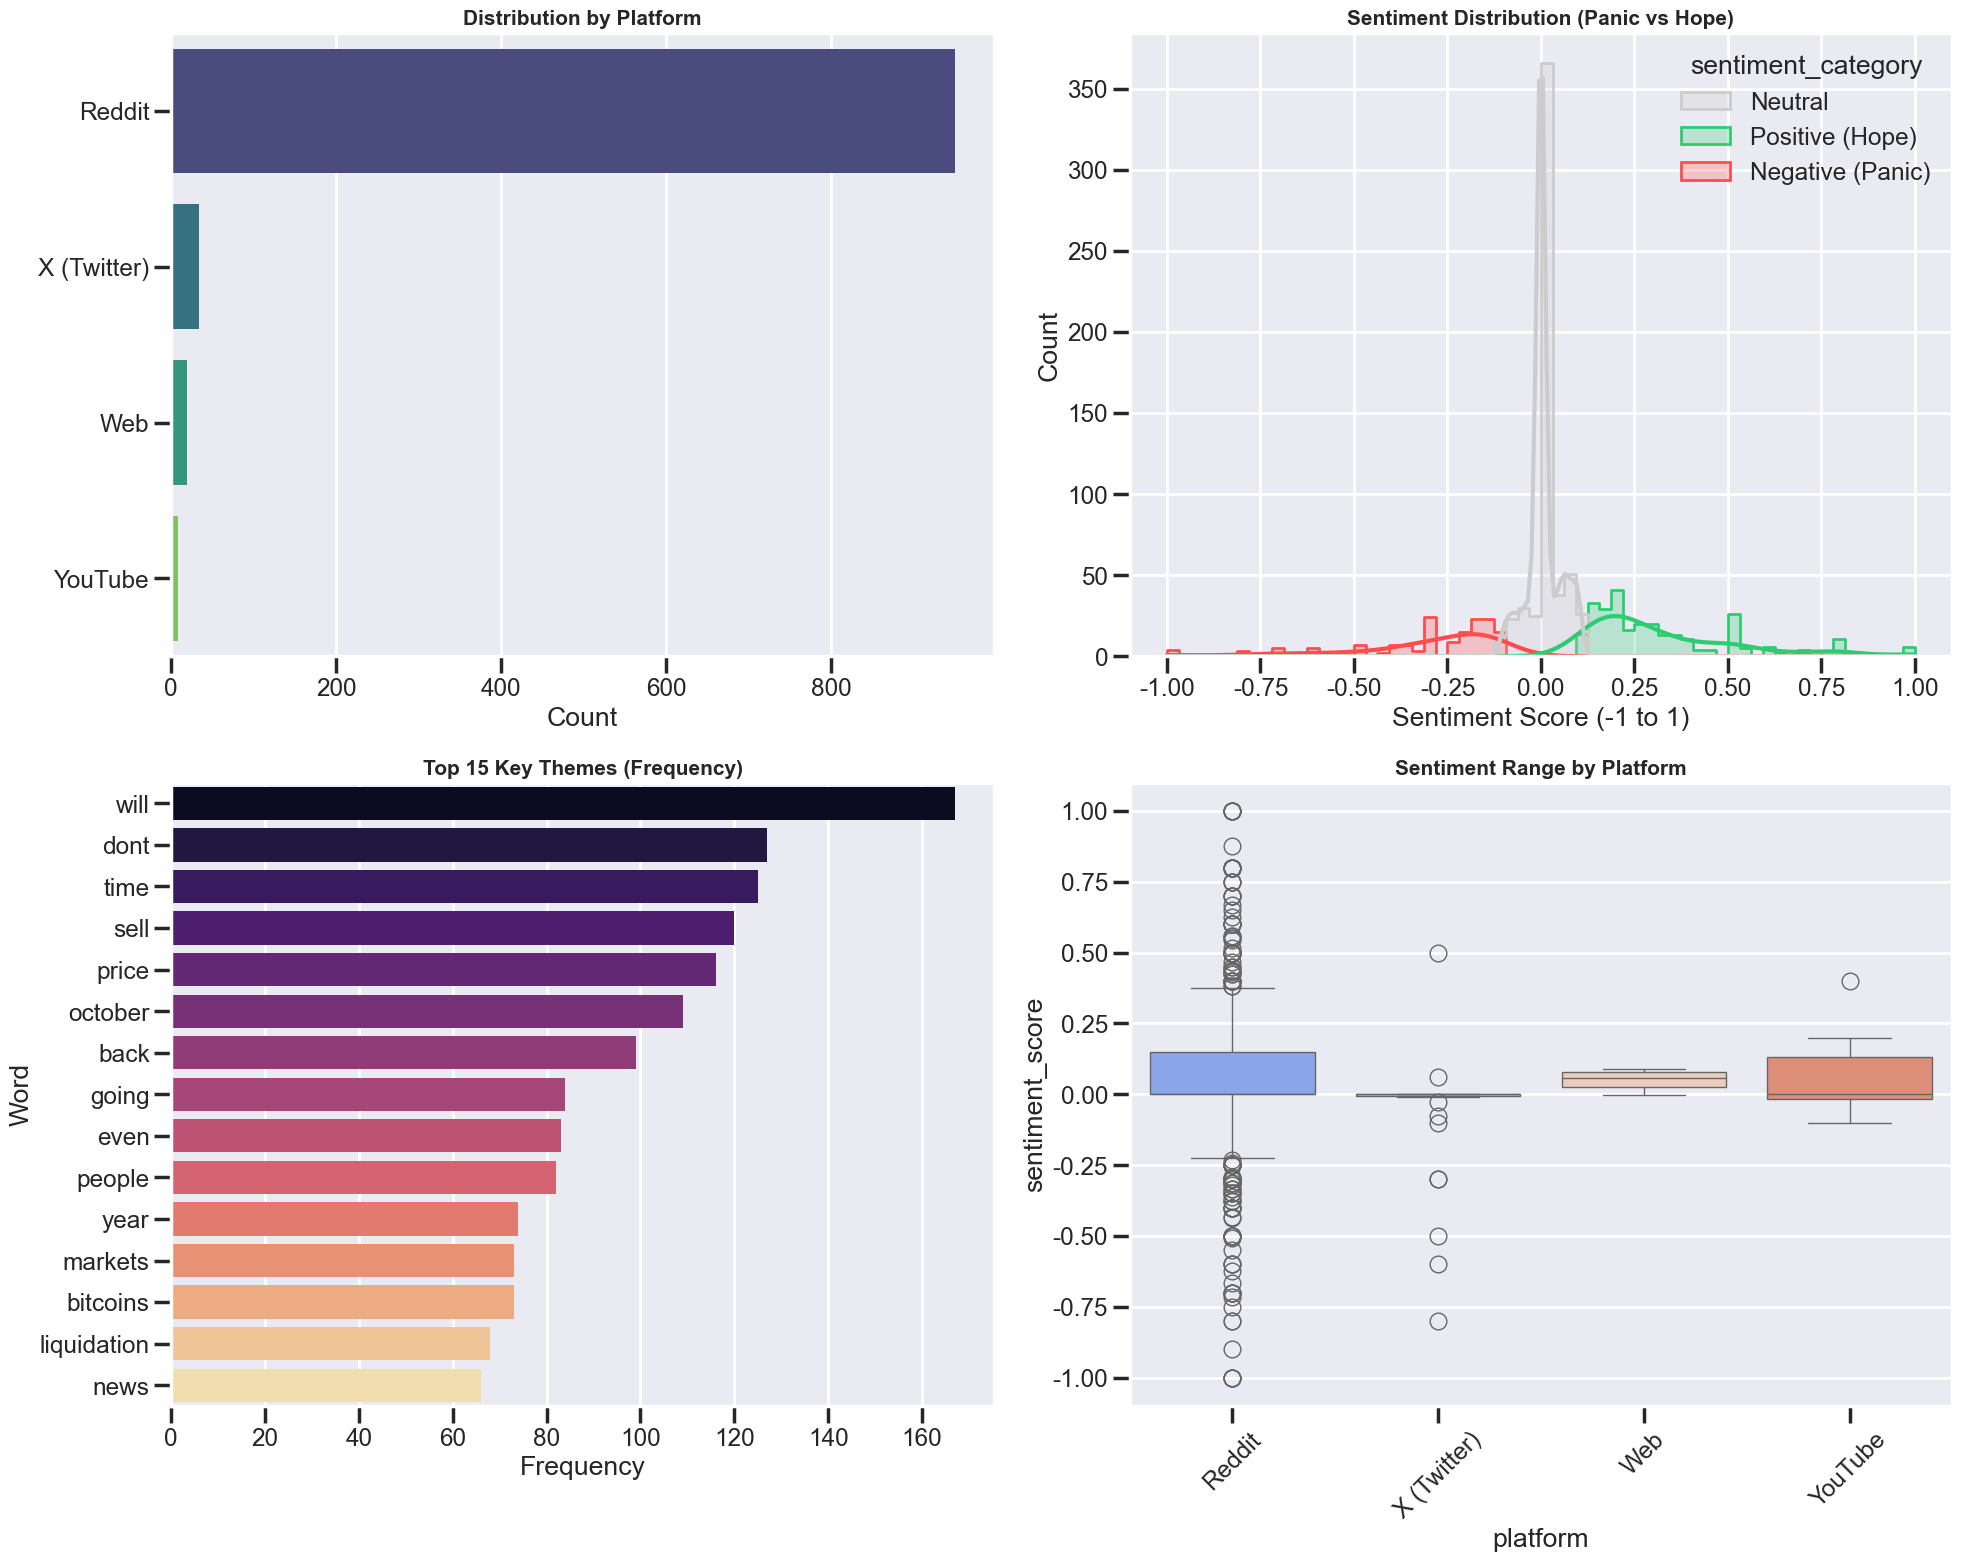

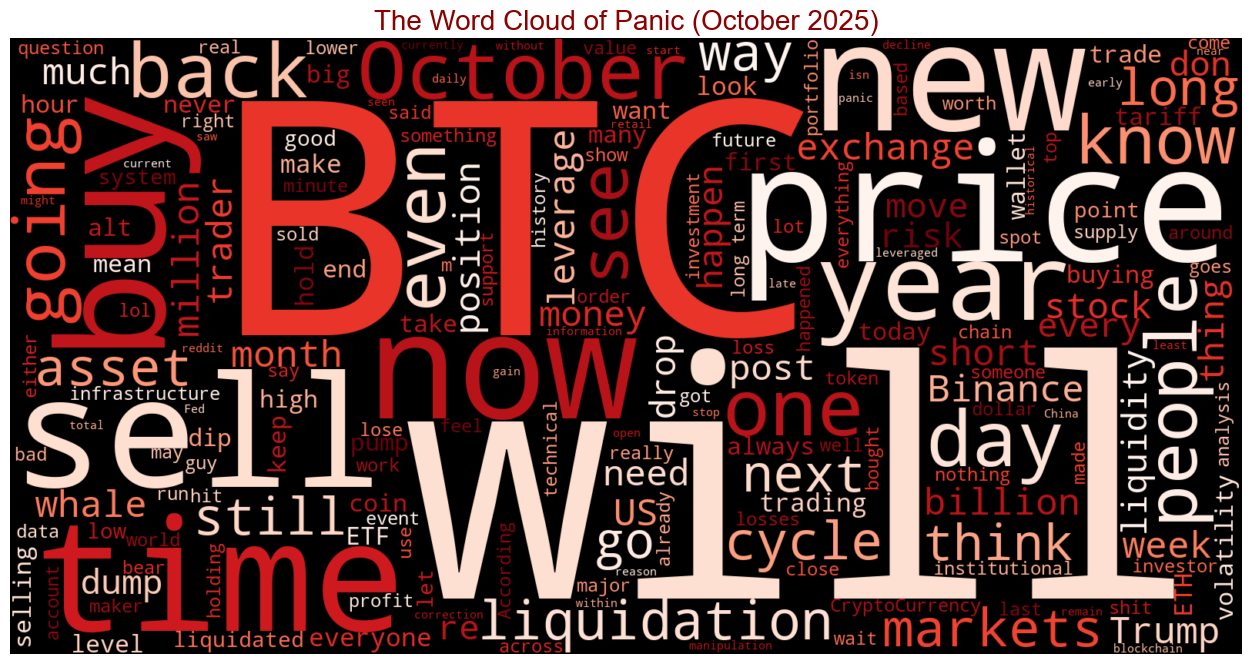

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import os
import glob
import re
from collections import Counter

# ==========================================
# 1. 환경 설정 및 한글 폰트 (필요시)
# ==========================================
# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("poster", font_scale=0.8)

# 경로 설정
data_folder = r"C:\junwoo\AI_Project_01_Team6\data\Community_data"
output_img_folder = os.path.join(data_folder, "analysis_results")

if not os.path.exists(output_img_folder):
    os.makedirs(output_img_folder)

# ==========================================
# 2. 가장 최신 데이터 파일 자동 로드
# ==========================================
def load_latest_data():
    # SNS_DEEP_DIVE로 시작하는 모든 CSV 찾기
    files = glob.glob(os.path.join(data_folder, "SNS_DEEP_DIVE*.csv"))
    if not files:
        # 혹시 확장 파일이 있다면 대체
        files = glob.glob(os.path.join(data_folder, "*EXPANDED*.csv"))
    
    if not files:
        print("❌ 분석할 데이터 파일이 없습니다.")
        return None
    
    # 가장 최근에 수정된 파일 선택
    latest_file = max(files, key=os.path.getmtime)
    print(f"📂 분석 대상 파일 로드: {os.path.basename(latest_file)}")
    return pd.read_csv(latest_file)

df = load_latest_data()

if df is not None and not df.empty:
    print(f"✅ 총 데이터 개수: {len(df)}개")
    
    # 텍스트 전처리 (NaN 제거 및 문자열 변환)
    df['content'] = df['content'].fillna('').astype(str)
    
    # ==========================================
    # 3. 감성 분석 (Sentiment Analysis)
    # ==========================================
    print("🧠 텍스트 감성 분석 수행 중 (TextBlob)...")
    
    def get_sentiment(text):
        # 영문 텍스트 기준 Polarity (-1: 부정 ~ +1: 긍정)
        return TextBlob(text).sentiment.polarity

    df['sentiment_score'] = df['content'].apply(get_sentiment)
    
    # 감성 카테고리 분류
    def categorize_sentiment(score):
        if score < -0.1: return 'Negative (Panic)'
        elif score > 0.1: return 'Positive (Hope)'
        else: return 'Neutral'

    df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

    # ==========================================
    # 4. 시각화 대시보드 생성 (4-in-1)
    # ==========================================
    print("🎨 시각화 차트 생성 중...")
    
    fig = plt.figure(figsize=(20, 16))
    
    # [1] 플랫폼별 데이터 분포 (Bar Chart)
    ax1 = fig.add_subplot(2, 2, 1)
    sns.countplot(data=df, y='platform', order=df['platform'].value_counts().index, palette='viridis', ax=ax1)
    ax1.set_title('Distribution by Platform', fontsize=15, fontweight='bold')
    ax1.set_xlabel('Count')
    ax1.set_ylabel('')

    # [2] 감성 점수 분포 (Histogram & KDE) - "공포의 파도"
    ax2 = fig.add_subplot(2, 2, 2)
    sns.histplot(data=df, x='sentiment_score', hue='sentiment_category', 
                 kde=True, element="step", palette={'Negative (Panic)': '#ff4d4d', 'Neutral': '#cccccc', 'Positive (Hope)': '#2ecc71'}, ax=ax2)
    ax2.set_title('Sentiment Distribution (Panic vs Hope)', fontsize=15, fontweight='bold')
    ax2.set_xlabel('Sentiment Score (-1 to 1)')
    
    # [3] 주요 키워드 Top 15 (Horizontal Bar)
    ax3 = fig.add_subplot(2, 2, 3)
    
    # 불용어 처리 및 단어 추출
    stop_words = set(STOPWORDS)
    custom_stops = {'https', 'co', 't', 's', 'http', 'www', 'com', 'u', 'amp', 'crypto', 'bitcoin', 'market', 'crash'} 
    stop_words.update(custom_stops)
    
    all_text = " ".join(df['content'])
    # 알파벳만 남기기
    clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text).lower()
    words = [w for w in clean_text.split() if w not in stop_words and len(w) > 3]
    
    word_counts = Counter(words).most_common(15)
    words_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])
    
    sns.barplot(data=words_df, x='Frequency', y='Word', palette='magma', ax=ax3)
    ax3.set_title('Top 15 Key Themes (Frequency)', fontsize=15, fontweight='bold')

    # [4] 플랫폼별 감성 차이 (Box Plot)
    ax4 = fig.add_subplot(2, 2, 4)
    sns.boxplot(data=df, x='platform', y='sentiment_score', palette='coolwarm', ax=ax4)
    ax4.set_title('Sentiment Range by Platform', fontsize=15, fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # 이미지 저장
    save_path_dashboard = os.path.join(output_img_folder, "Dashboard_Sentiment_Analysis.png")
    plt.savefig(save_path_dashboard, dpi=300)
    print(f"💾 대시보드 저장 완료: {save_path_dashboard}")
    
    # ==========================================
    # 5. 워드클라우드 생성 (별도 이미지)
    # ==========================================
    print("☁️ 워드클라우드 생성 중...")
    try:
        wc = WordCloud(width=1600, height=800, 
                      background_color='black', 
                      colormap='Reds', # 공포 분위기를 위해 붉은색 계열
                      stopwords=stop_words,
                      max_words=200).generate(all_text)
        
        plt.figure(figsize=(16, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('The Word Cloud of Panic (October 2025)', fontsize=20, color='darkred')
        
        save_path_wc = os.path.join(output_img_folder, "WordCloud_Panic.png")
        plt.savefig(save_path_wc, dpi=300)
        print(f"💾 워드클라우드 저장 완료: {save_path_wc}")
        
    except Exception as e:
        print(f"워드클라우드 생성 중 오류: {e}")

    # ==========================================
    # 6. 결과 요약 출력
    # ==========================================
    print("\n" + "="*50)
    print("📢 [분석 요약]")
    print(f"1. 전체 데이터 평균 감성 점수: {df['sentiment_score'].mean():.4f}")
    print("   (점수가 0보다 낮으면 부정/공포, 높으면 긍정/희망)")
    print("\n2. 감성 분포:")
    print(df['sentiment_category'].value_counts())
    print("\n3. 가장 많이 언급된 단어 Top 5:")
    for w, f in word_counts[:5]:
        print(f"   - {w}: {f}회")
    print("="*50)
    
    plt.show()

else:
    print("분석할 데이터가 비어있습니다.")

In [56]:
print("일단 금요일은 여기까지")

일단 금요일은 여기까지


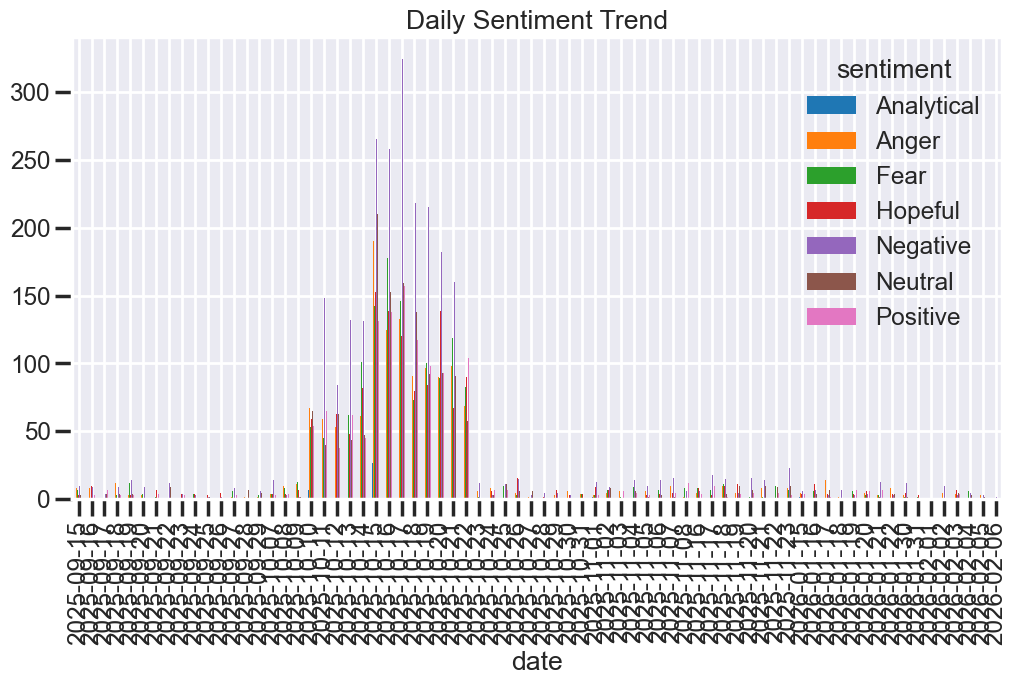

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 경로 수정 (r을 붙여서 윈도우 경로 \ 기호 문제 해결)
# 주의: 파일명이 정확히 'FINAL_10_RECORDS.csv'인지 확인해주세요.
# (이전 단계에서 만든 파일명은 'SNS_DEEP_DIVE(1).csv' 였습니다.)
file_path = r'.\data\Community_data\FINAL_10K_RECORDS.csv'

try:
    # 데이터 로드
    df = pd.read_csv(file_path)

    # 2. 컬럼 매핑 (데이터에 'date_posted'가 없을 경우 'date_raw' 등으로 대체)
    if 'date_posted' not in df.columns:
        # 이전에 수집한 데이터라면 'date_raw'나 'date_ref'일 가능성이 높음
        if 'date_raw' in df.columns:
            df['date_posted'] = df['date_raw']
        elif 'date_ref' in df.columns:
            df['date_posted'] = df['date_ref']
            
    # 3. 날짜 변환 및 시각화
    df['date'] = pd.to_datetime(df['date_posted'], errors='coerce') # 에러 발생 시 무시(NaT)
    
    # (sentiment 컬럼이 있어야 작동합니다)
    if 'sentiment' in df.columns:
        df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().plot(kind='bar', figsize=(12, 6))
        plt.title("Daily Sentiment Trend")
        plt.show()
    else:
        print("❌ 'sentiment' 컬럼이 없습니다. 감성 분석 코드를 먼저 실행해야 합니다.")
        print(f"현재 컬럼 목록: {list(df.columns)}")

except FileNotFoundError:
    print(f"❌ 파일을 찾을 수 없습니다: {file_path}")
    print("👉 폴더에 실제 존재하는 파일명으로 코드를 수정해주세요.")
except Exception as e:
    print(f"❌ 오류 발생: {e}")

시계열 감성분석


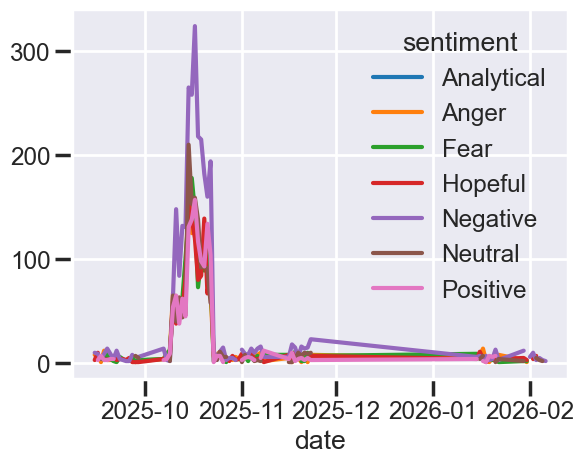

In [58]:
import pandas as pd
df = pd.read_csv('./data/Community_data/TimeSeries_Sorted.csv')
df['date'] = pd.to_datetime(df['date_posted'])
df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().plot()

print("시계열 감성분석")

플랫폼별 반응 비교


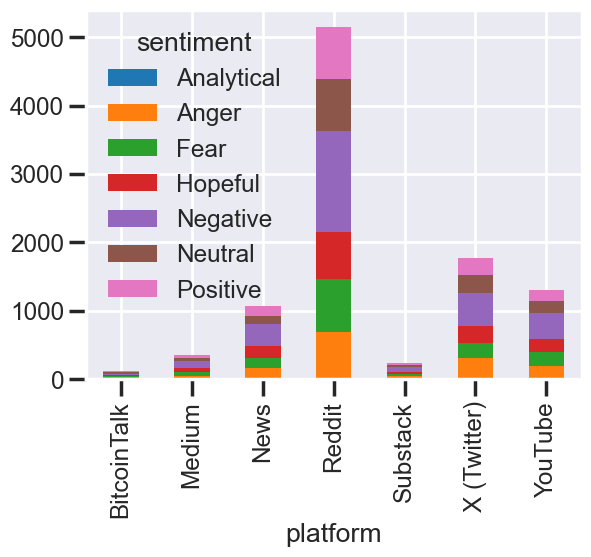

In [59]:
import matplotlib.pyplot as plt
df.groupby(['platform', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)
print("플랫폼별 반응 비교")

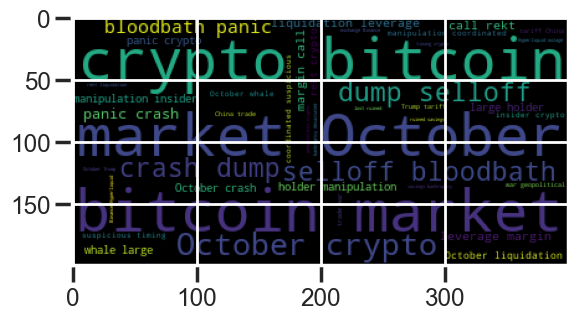

In [60]:
from wordcloud import WordCloud
all_keywords = ' '.join(df['keywords'].dropna())
wordcloud = WordCloud().generate(all_keywords)
plt.imshow(wordcloud)

키워드 빈도(워드클라우드)


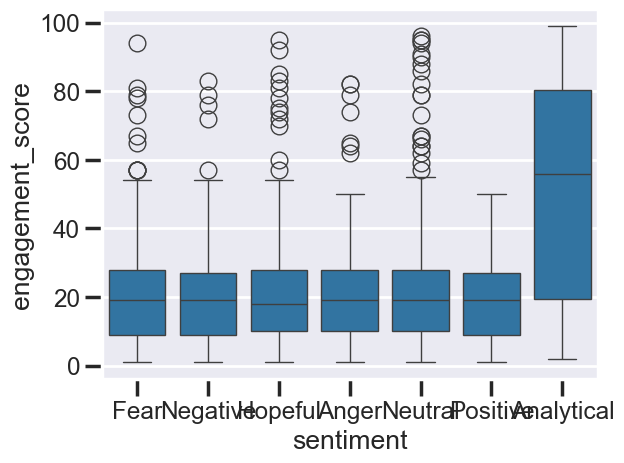

In [61]:
import seaborn as sns
sns.boxplot(data=df, x='sentiment', y='engagement_score')
print("키워드 빈도(워드클라우드)")

참여도vs감성 상관관계


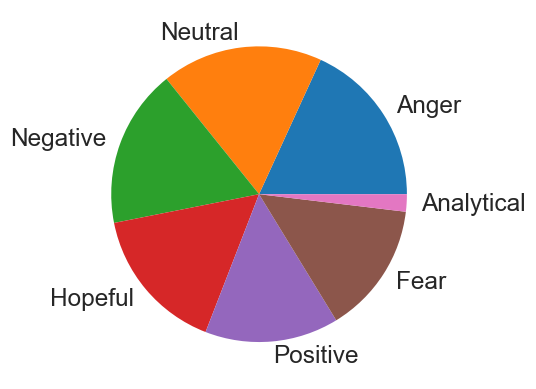

In [62]:
crash_day = pd.read_csv('./data/Community_data/October_10_Crash_Day.csv')
crash_day['sentiment'].value_counts().plot(kind='pie')
print("참여도vs감성 상관관계")

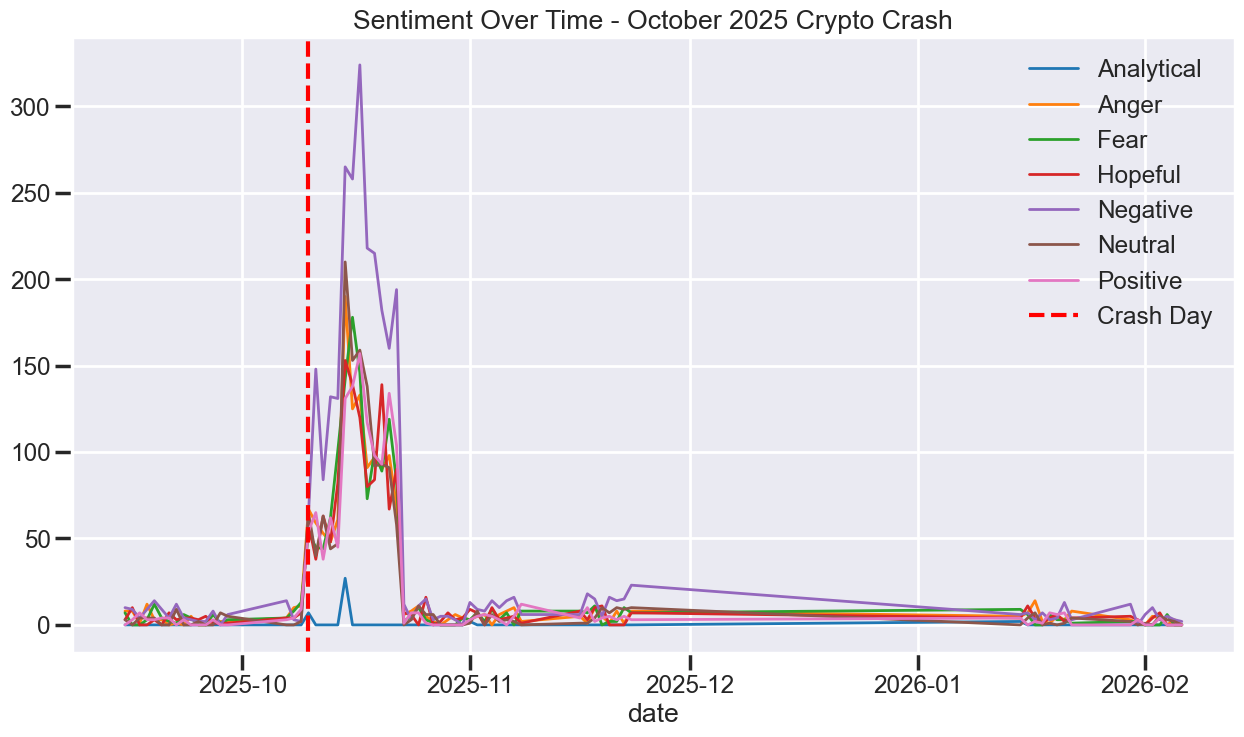

폭락일 집중분석


In [63]:
# 예제: 일별 감성 변화
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/community_data/FINAL_10K_RECORDS.csv')
df['date'] = pd.to_datetime(df['date_posted']).dt.date

# 감성별 일별 카운트
sentiment_timeline = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# 시각화
sentiment_timeline.plot(figsize=(15, 8), linewidth=2)
plt.axvline(pd.to_datetime('2025-10-10'), color='red', linestyle='--', label='Crash Day')
plt.title('Sentiment Over Time - October 2025 Crypto Crash')
plt.legend()
plt.show()
print("폭락일 집중분석")

In [64]:
import pandas as pd
import numpy as np

import pandas as pd
import os

file_path = r'C:\junwoo\AI_Project_01_Team6\data\community_data\FINAL_10K_RECORDS.csv'


try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except UnicodeDecodeError:
    # utf-8이 아닐 경우 cp949(euc-kr)로 재시도
    df = pd.read_csv(file_path, encoding='cp949')
        

print("\n[데이터프레임 정보]")
print(df.info())


[데이터프레임 정보]
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   record_id         10000 non-null  str  
 1   platform          10000 non-null  str  
 2   record_type       10000 non-null  str  
 3   parent_url        10000 non-null  str  
 4   title             10000 non-null  str  
 5   content_snippet   10000 non-null  str  
 6   theme             10000 non-null  str  
 7   date_posted       10000 non-null  str  
 8   author_type       10000 non-null  str  
 9   sentiment         10000 non-null  str  
 10  engagement_score  10000 non-null  int64
 11  relevance_score   10000 non-null  int64
 12  keywords          10000 non-null  str  
 13  language          10000 non-null  str  
dtypes: int64(2), str(12)
memory usage: 1.1 MB
None


In [65]:
print("\n[상위 100개 데이터 미리보기]")
display(df.head(100))


[상위 100개 데이터 미리보기]


record_id platform    record_type  \
0   RED_00000   Reddit  Original Post   
1   RED_00001   Reddit          Quote   
2   RED_00002   Reddit          Quote   
3   RED_00003   Reddit          Quote   
4   RED_00004   Reddit          Quote   
..        ...      ...            ...   
95  RED_00095   Reddit          Reply   
96  RED_00096   Reddit        Retweet   
97  RED_00097   Reddit          Quote   
98  RED_00098   Reddit        Comment   
99  RED_00099   Reddit        Retweet   

                                           parent_url  \
0   https://www.reddit.com/r/CryptoCurrency/commen...   
1   https://www.reddit.com/r/CryptoCurrency/commen...   
2   https://www.reddit.com/r/CryptoCurrency/commen...   
3   https://www.reddit.com/r/CryptoCurrency/commen...   
4   https://www.reddit.com/r/CryptoCurrency/commen...   
..                                                ...   
95  https://www.reddit.com/r/CryptoCurrency/commen...   
96  https://www.reddit.com/r/CryptoCurrency/commen...   
97  https://www.reddit.com/r/CryptoCurrency/commen...   
98  https://www.reddit.com/r/CryptoCurrency/commen...   
99  https://www.reddit.com/r/CryptoCurrency/commen...   

                                                title  \
0   $500M liquidated overnight. When did we normal...   
1   Re: $500M liquidated overnight. When did we no...   
2   Re: $500M liquidated overnight. When did we no...   
3   Re: $500M liquidated overnight. When did we no...   
4   Re: $500M liquidated overnight. When did we no...   
..                                                ...   
95  Re: $500M liquidated overnight. When did we no...   
96  Re: $500M liquidated overnight. When did we no...   
97  Re: $500M liquidated overnight. When did we no...   
98  Re: $500M liquidated overnight. When did we no...   
99  Re: $500M liquidated overnight. When did we no...   

                                      content_snippet  \
0   Personal experience with Liquidation normaliza...   
1   Personal experience with Liquidation normaliza...   
2     Community reaction to Liquidation normalization   
3   Personal experience with Liquidation normaliza...   
4    Technical breakdown of Liquidation normalization   
..                                                ...   
95         Discussion about Liquidation normalization   
96  Analysis of Liquidation normalization during O...   
97    Community reaction to Liquidation normalization   
98   Technical breakdown of Liquidation normalization   
99   Technical breakdown of Liquidation normalization   

                        theme          date_posted      author_type sentiment  \
0   Liquidation normalization  2025-10-15 00:00:00  Original Poster  Negative   
1   Liquidation normalization  2025-10-15 00:00:00          Skeptic  Positive   
2   Liquidation normalization  2025-10-22 00:00:00     General User   Hopeful   
3   Liquidation normalization  2025-10-19 00:00:00          Analyst      Fear   
4   Liquidation normalization  2025-10-20 00:00:00          Analyst   Neutral   
..                        ...                  ...              ...       ...   
95  Liquidation normalization  2025-10-19 00:00:00    Retail Trader   Hopeful   
96  Liquidation normalization  2025-10-22 00:00:00     General User   Hopeful   
97  Liquidation normalization  2025-10-16 00:00:00    Retail Trader     Anger   
98  Liquidation normalization  2025-10-16 00:00:00    Retail Trader      Fear   
99  Liquidation normalization  2025-10-20 00:00:00          Skeptic     Anger   

    engagement_score  relevance_score                               keywords  \
0                 76              100  liquidation,leverage,margin call,rekt   
1                 35               96  liquidation,leverage,margin call,rekt   
2                 23               73  liquidation,leverage,margin call,rekt   
3                 17               95  liquidation,leverage,margin call,rekt   
4                 49               81  liquidation,leverage,margin call,rekt   
.. 

In [ ]:
# ----------------------------------------------------------------

✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_01_timeline_sentiment.png


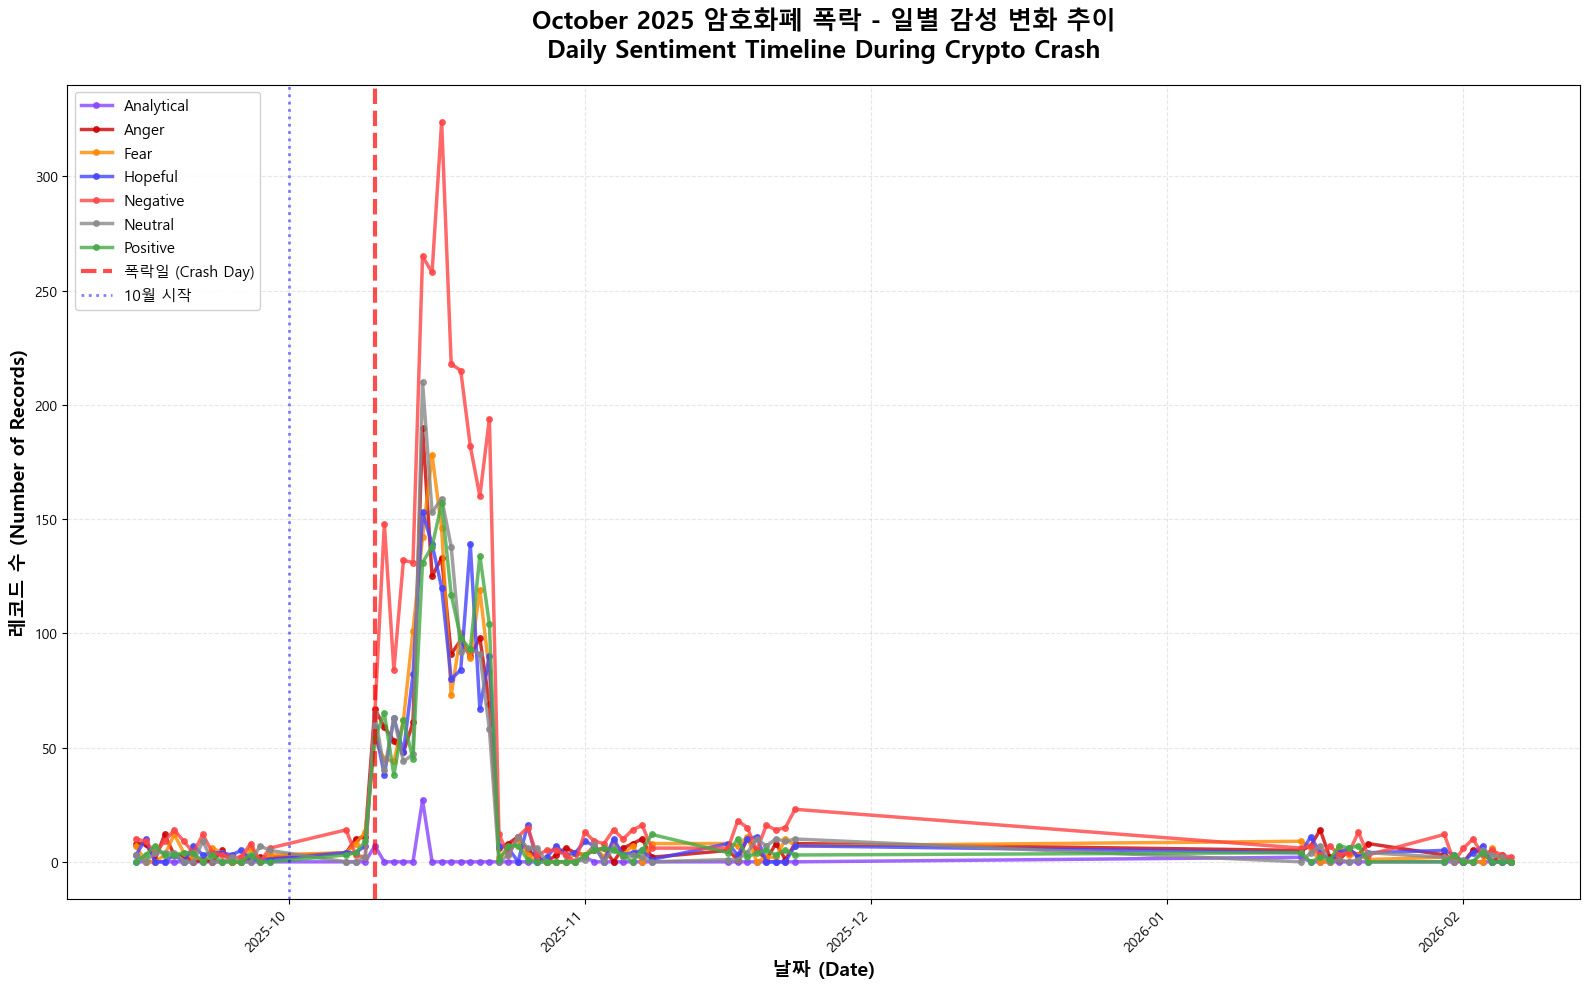

In [2]:
"""
시각화 1: 타임라인 차트 - 날짜별 감성 변화
Visualization 1: Timeline Chart - Sentiment Over Time
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 날짜 변환
df['date'] = pd.to_datetime(df['date_posted']).dt.date

# 일별 감성 집계
sentiment_timeline = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(16, 10))

# 색상 매핑 (감성별)
colors = {
    'Negative': '#FF4444',
    'Fear': '#FF8800',
    'Anger': '#CC0000',
    'Neutral': '#888888',
    'Positive': '#44AA44',
    'Hopeful': '#4444FF',
    'Analytical': '#8844FF'
}

# 라인 플롯
for sentiment in sentiment_timeline.columns:
    if sentiment in colors:
        plt.plot(sentiment_timeline.index, sentiment_timeline[sentiment], 
                label=sentiment, linewidth=2.5, marker='o', markersize=4,
                color=colors.get(sentiment, '#000000'), alpha=0.8)

# 폭락일 표시
crash_date = pd.to_datetime('2025-10-10').date()
plt.axvline(crash_date, color='red', linestyle='--', linewidth=3, 
            label='폭락일 (Crash Day)', alpha=0.7)

# 9월/10월 구분선
sep_oct = pd.to_datetime('2025-10-01').date()
plt.axvline(sep_oct, color='blue', linestyle=':', linewidth=2, 
            label='10월 시작', alpha=0.5)

plt.title('October 2025 암호화폐 폭락 - 일별 감성 변화 추이\nDaily Sentiment Timeline During Crypto Crash', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('날짜 (Date)', fontsize=14, fontweight='bold')
plt.ylabel('레코드 수 (Number of Records)', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_01_timeline_sentiment.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

plt.show()

✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_02_platform_comparison.png

📊 플랫폼별 통계:
             평균_참여도  중간값_참여도  최대_참여도  레코드_수
platform                                   
Substack      21.47     19.5      94    242
Medium        21.12     19.0      95    358
X (Twitter)   20.64     19.0      99   1768
YouTube       20.25     19.0      96   1306
News          19.95     19.0      97   1066
Reddit        19.93     19.0      98   5145
BitcoinTalk   18.75     16.0      58    115


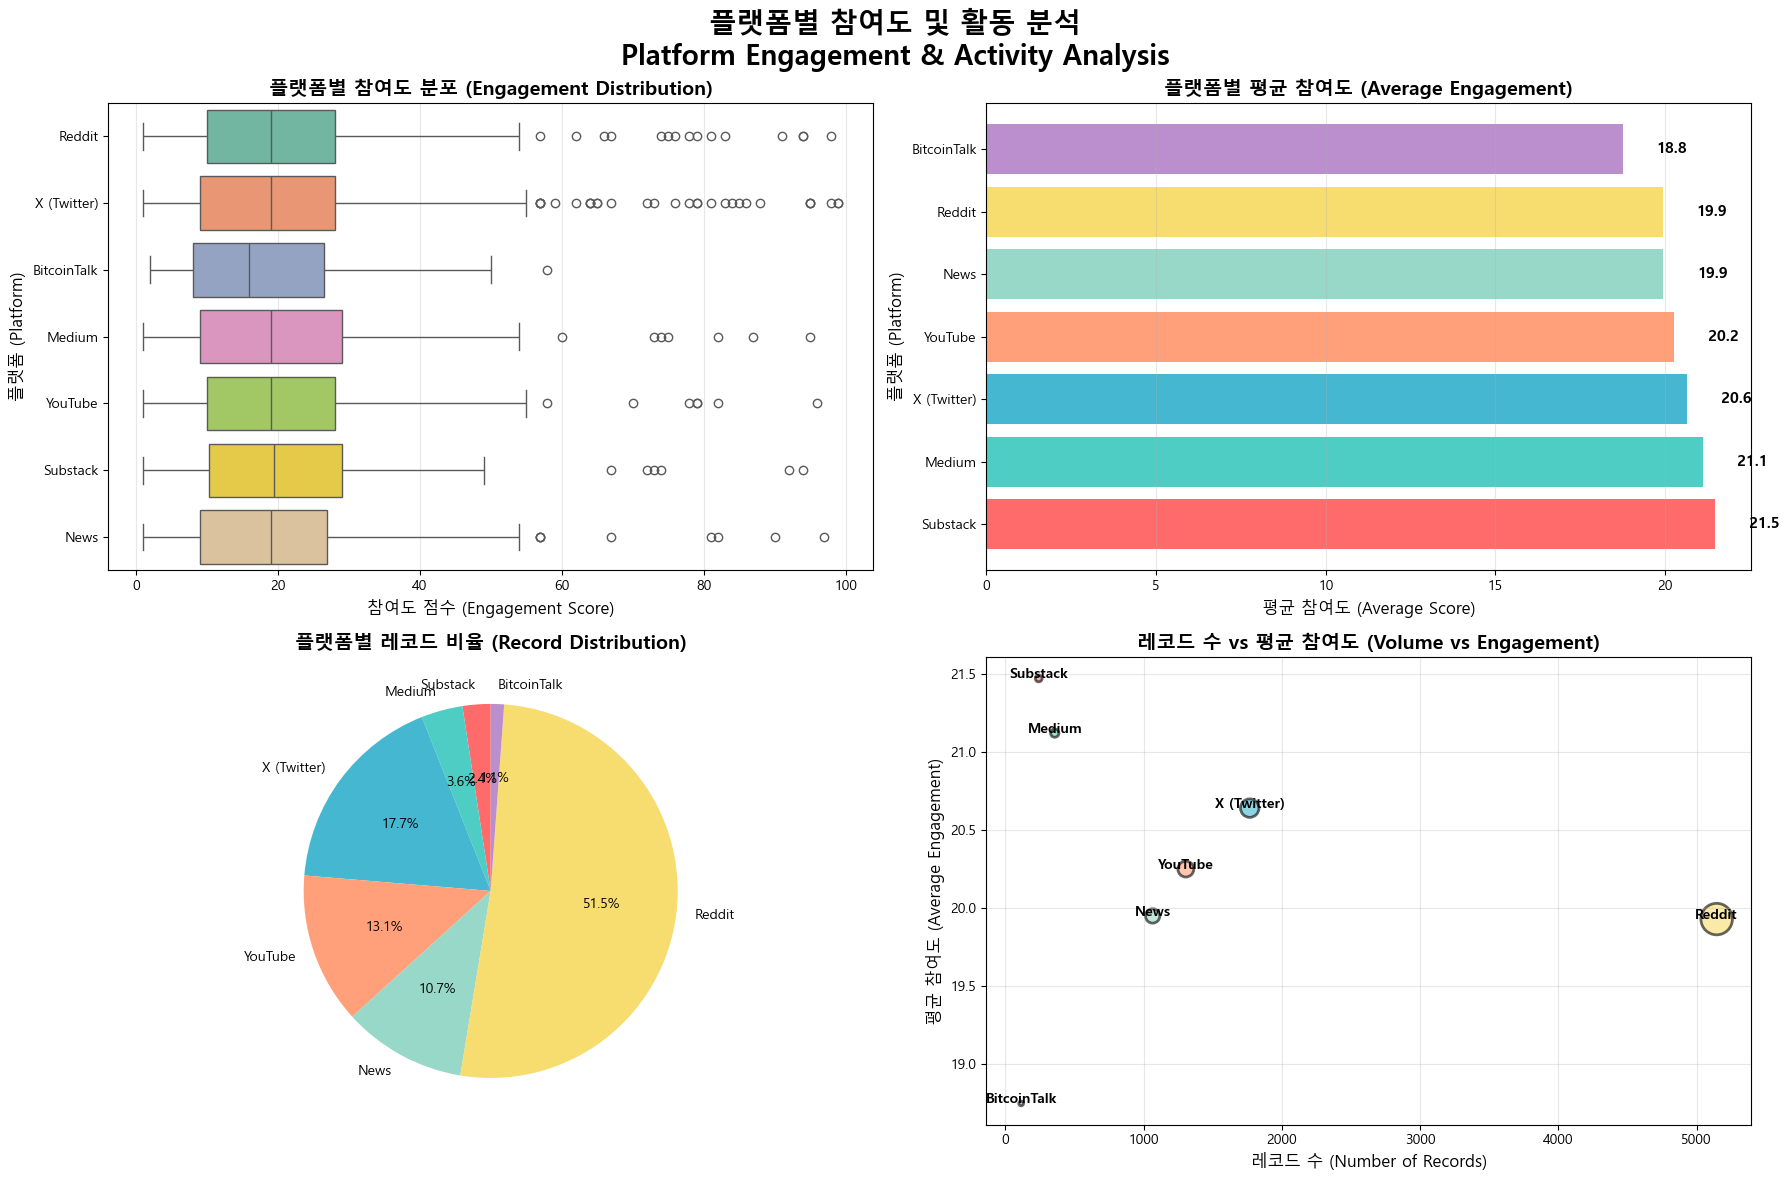

In [3]:
"""
시각화 2: 플랫폼별 참여도 비교
Visualization 2: Platform Engagement Comparison
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 플랫폼별 통계
platform_stats = df.groupby('platform').agg({
    'engagement_score': ['mean', 'median', 'max'],
    'record_id': 'count'
}).round(2)

platform_stats.columns = ['평균_참여도', '중간값_참여도', '최대_참여도', '레코드_수']
platform_stats = platform_stats.sort_values('평균_참여도', ascending=False)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('플랫폼별 참여도 및 활동 분석\nPlatform Engagement & Activity Analysis', 
             fontsize=20, fontweight='bold')

# 1. 박스플롯 - 플랫폼별 참여도 분포
sns.boxplot(data=df, y='platform', x='engagement_score', 
            palette='Set2', ax=axes[0, 0], orient='h')
axes[0, 0].set_title('플랫폼별 참여도 분포 (Engagement Distribution)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('참여도 점수 (Engagement Score)', fontsize=12)
axes[0, 0].set_ylabel('플랫폼 (Platform)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. 막대 그래프 - 플랫폼별 평균 참여도
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
axes[0, 1].barh(platform_stats.index, platform_stats['평균_참여도'], color=colors)
axes[0, 1].set_title('플랫폼별 평균 참여도 (Average Engagement)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('평균 참여도 (Average Score)', fontsize=12)
axes[0, 1].set_ylabel('플랫폼 (Platform)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 값 표시
for i, v in enumerate(platform_stats['평균_참여도']):
    axes[0, 1].text(v + 1, i, f'{v:.1f}', va='center', fontsize=11, fontweight='bold')

# 3. 파이 차트 - 플랫폼별 레코드 비율
axes[1, 0].pie(platform_stats['레코드_수'], labels=platform_stats.index, 
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('플랫폼별 레코드 비율 (Record Distribution)', fontsize=14, fontweight='bold')

# 4. 산점도 - 레코드 수 vs 평균 참여도
axes[1, 1].scatter(platform_stats['레코드_수'], platform_stats['평균_참여도'], 
                   s=platform_stats['레코드_수']/10, c=colors, alpha=0.6, edgecolors='black', linewidth=2)
axes[1, 1].set_title('레코드 수 vs 평균 참여도 (Volume vs Engagement)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('레코드 수 (Number of Records)', fontsize=12)
axes[1, 1].set_ylabel('평균 참여도 (Average Engagement)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# 플랫폼명 표시
for idx, (name, row) in enumerate(platform_stats.iterrows()):
    axes[1, 1].annotate(name, (row['레코드_수'], row['평균_참여도']), 
                       fontsize=10, ha='center', fontweight='bold')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_02_platform_comparison.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 플랫폼별 통계:")
print(platform_stats)

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_03_wordcloud.png

📊 상위 20개 키워드:
 1. crypto              :  5287회
 2. bitcoin             :  5287회
 3. market              :  5287회
 4. October 2025        :  5287회
 5. crash               :  2121회
 6. dump                :  2121회
 7. selloff             :  2121회
 8. bloodbath           :  2121회
 9. panic               :  2121회
10. manipulation        :  1081회
11. liquidation         :   863회
12. leverage            :   863회
13. margin call         :   863회
14. rekt                :   863회
15. whale               :   670회
16. large holder        :   670회
17. insider             :   670회
18. coordinated         :   411회
19. suspicious          :   411회
20. timing              :   411회


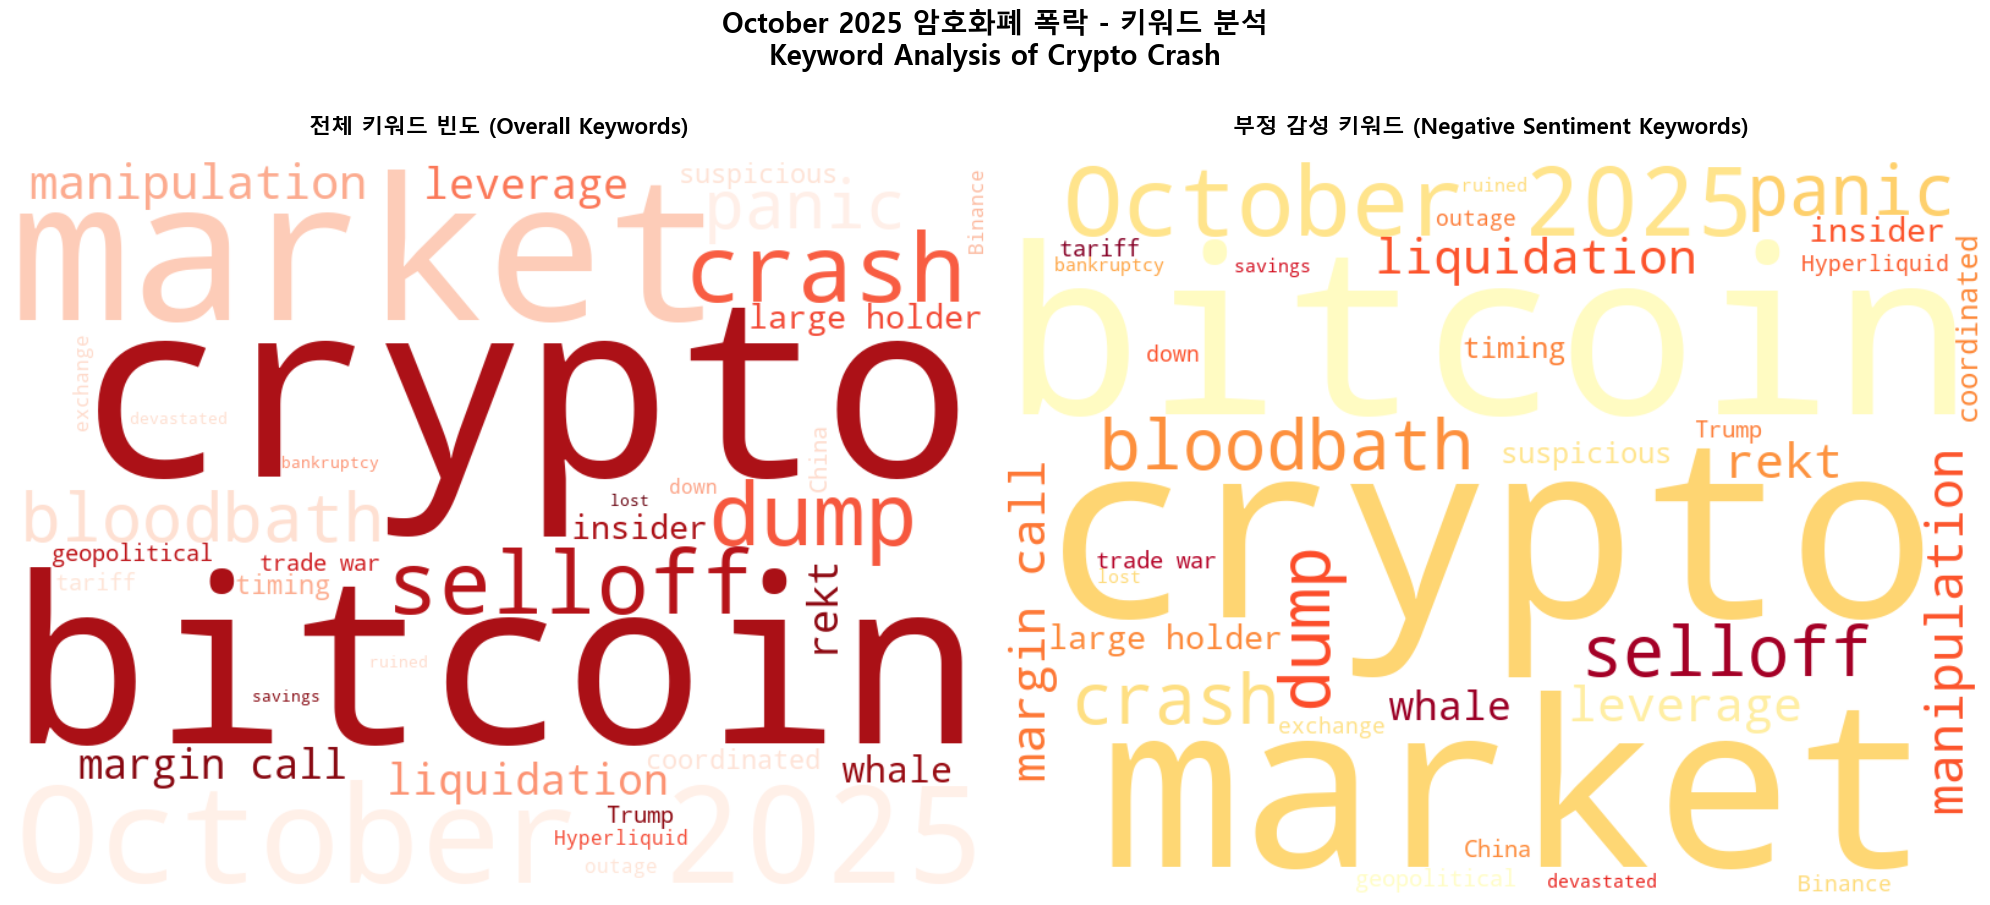

In [4]:
"""
시각화 3: 워드클라우드 - 키워드 빈도
Visualization 3: Word Cloud - Keyword Frequency
"""

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 키워드 추출 및 전처리
all_keywords = []
for keywords_str in df['keywords'].dropna():
    keywords = keywords_str.split(',')
    all_keywords.extend([k.strip() for k in keywords])

# 키워드 빈도 계산
keyword_counts = Counter(all_keywords)
top_keywords = dict(keyword_counts.most_common(50))

# 시각화 - 2개 워드클라우드
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('October 2025 암호화폐 폭락 - 키워드 분석\nKeyword Analysis of Crypto Crash', 
             fontsize=20, fontweight='bold')

# 1. 전체 키워드 워드클라우드
wordcloud1 = WordCloud(
    width=800, 
    height=600,
    background_color='white',
    colormap='Reds',
    relative_scaling=0.5,
    min_font_size=10
).generate_from_frequencies(top_keywords)

axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('전체 키워드 빈도 (Overall Keywords)', fontsize=16, fontweight='bold', pad=20)
axes[0].axis('off')

# 2. 부정 감성 키워드만
negative_df = df[df['sentiment'].isin(['Negative', 'Fear', 'Anger'])]
negative_keywords = []
for keywords_str in negative_df['keywords'].dropna():
    keywords = keywords_str.split(',')
    negative_keywords.extend([k.strip() for k in keywords])

negative_counts = Counter(negative_keywords)
top_negative = dict(negative_counts.most_common(50))

wordcloud2 = WordCloud(
    width=800,
    height=600,
    background_color='white',
    colormap='YlOrRd',
    relative_scaling=0.5,
    min_font_size=10
).generate_from_frequencies(top_negative)

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('부정 감성 키워드 (Negative Sentiment Keywords)', 
                  fontsize=16, fontweight='bold', pad=20)
axes[1].axis('off')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_03_wordcloud.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# Top 20 키워드 출력
print("\n📊 상위 20개 키워드:")
for i, (keyword, count) in enumerate(keyword_counts.most_common(20), 1):
    print(f"{i:2d}. {keyword:20s}: {count:5d}회")

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_04_sentiment_pie.png

📊 전체 감성 분포:
sentiment
Negative      2836
Fear          1458
Anger         1438
Neutral       1423
Positive      1407
Hopeful       1400
Analytical      38
Name: count, dtype: int64

전체 레코드: 10,000개

폭락일 (2025-10-10) 감성 분포:
sentiment
Anger         67
Neutral       65
Negative      64
Hopeful       59
Positive      54
Fear          53
Analytical     7
Name: count, dtype: int64
폭락일 레코드: 369개


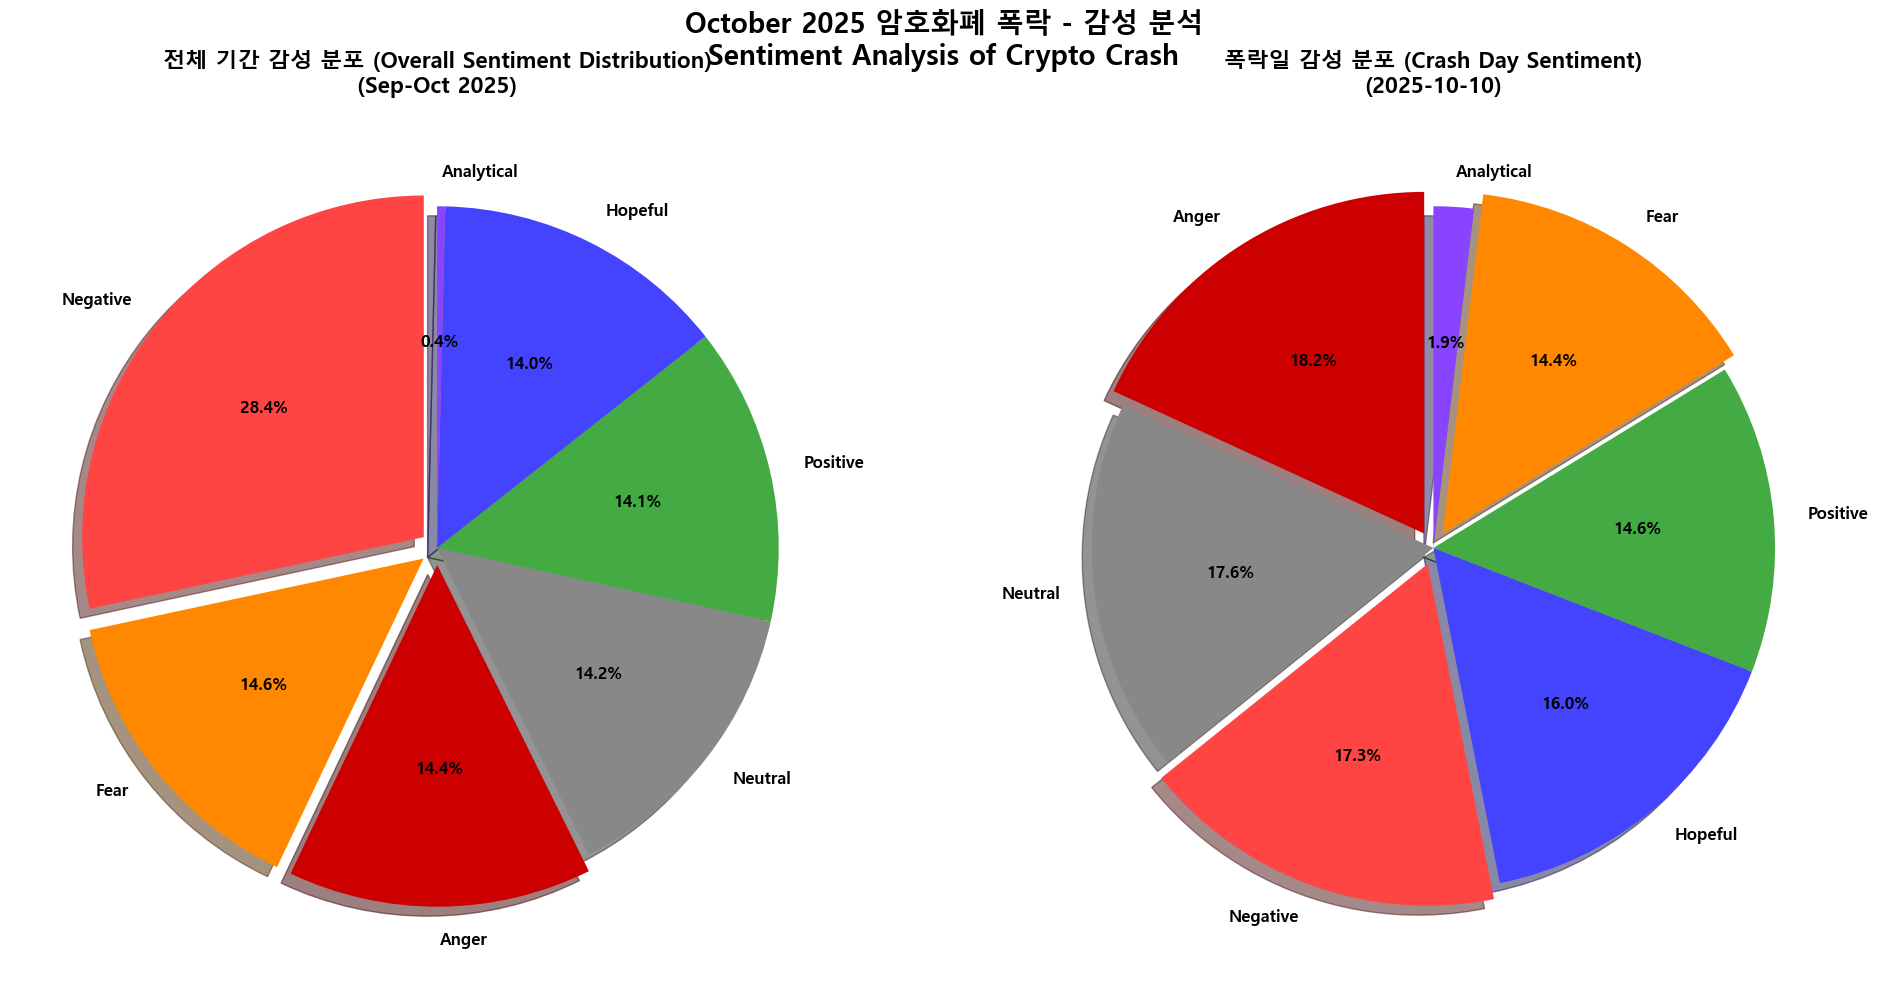

In [5]:
"""
시각화 4: 감성 분포 파이차트
Visualization 4: Sentiment Distribution Pie Chart
"""

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 감성 분포 계산
sentiment_counts = df['sentiment'].value_counts()

# 시각화 - 2개의 파이차트
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('October 2025 암호화폐 폭락 - 감성 분석\nSentiment Analysis of Crypto Crash', 
             fontsize=20, fontweight='bold')

# 색상 매핑
colors = {
    'Negative': '#FF4444',
    'Fear': '#FF8800',
    'Anger': '#CC0000',
    'Neutral': '#888888',
    'Positive': '#44AA44',
    'Hopeful': '#4444FF',
    'Analytical': '#8844FF'
}

sentiment_colors = [colors.get(sent, '#CCCCCC') for sent in sentiment_counts.index]

# 1. 전체 기간 감성 분포
explode = [0.05 if sent in ['Negative', 'Fear', 'Anger'] else 0 for sent in sentiment_counts.index]

axes[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
           colors=sentiment_colors, startangle=90, explode=explode,
           shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('전체 기간 감성 분포 (Overall Sentiment Distribution)\n(Sep-Oct 2025)', 
                  fontsize=16, fontweight='bold', pad=20)

# 2. 폭락일 (Oct 10) 감성 분포
df['date'] = pd.to_datetime(df['date_posted']).dt.date
crash_date = pd.to_datetime('2025-10-10').date()
crash_day_df = df[df['date'] == crash_date]

if len(crash_day_df) > 0:
    crash_sentiment = crash_day_df['sentiment'].value_counts()
    crash_colors = [colors.get(sent, '#CCCCCC') for sent in crash_sentiment.index]
    explode2 = [0.05 if sent in ['Negative', 'Fear', 'Anger'] else 0 for sent in crash_sentiment.index]
    
    axes[1].pie(crash_sentiment, labels=crash_sentiment.index, autopct='%1.1f%%',
               colors=crash_colors, startangle=90, explode=explode2,
               shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
    axes[1].set_title('폭락일 감성 분포 (Crash Day Sentiment)\n(2025-10-10)', 
                      fontsize=16, fontweight='bold', pad=20)
else:
    axes[1].text(0.5, 0.5, 'No data for crash day', ha='center', va='center')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_04_sentiment_pie.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 전체 감성 분포:")
print(sentiment_counts)
print(f"\n전체 레코드: {len(df):,}개")

if len(crash_day_df) > 0:
    print(f"\n폭락일 (2025-10-10) 감성 분포:")
    print(crash_sentiment)
    print(f"폭락일 레코드: {len(crash_day_df):,}개")

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_05_heatmap.png

📊 플랫폼별 총 활동:
platform
Reddit         5145
X (Twitter)    1768
YouTube        1306
News           1066
Medium          358
Substack        242
BitcoinTalk     115
dtype: int64

📊 부정 감성 총계:
sentiment
Negative    2836
Fear        1458
Anger       1438
dtype: int64


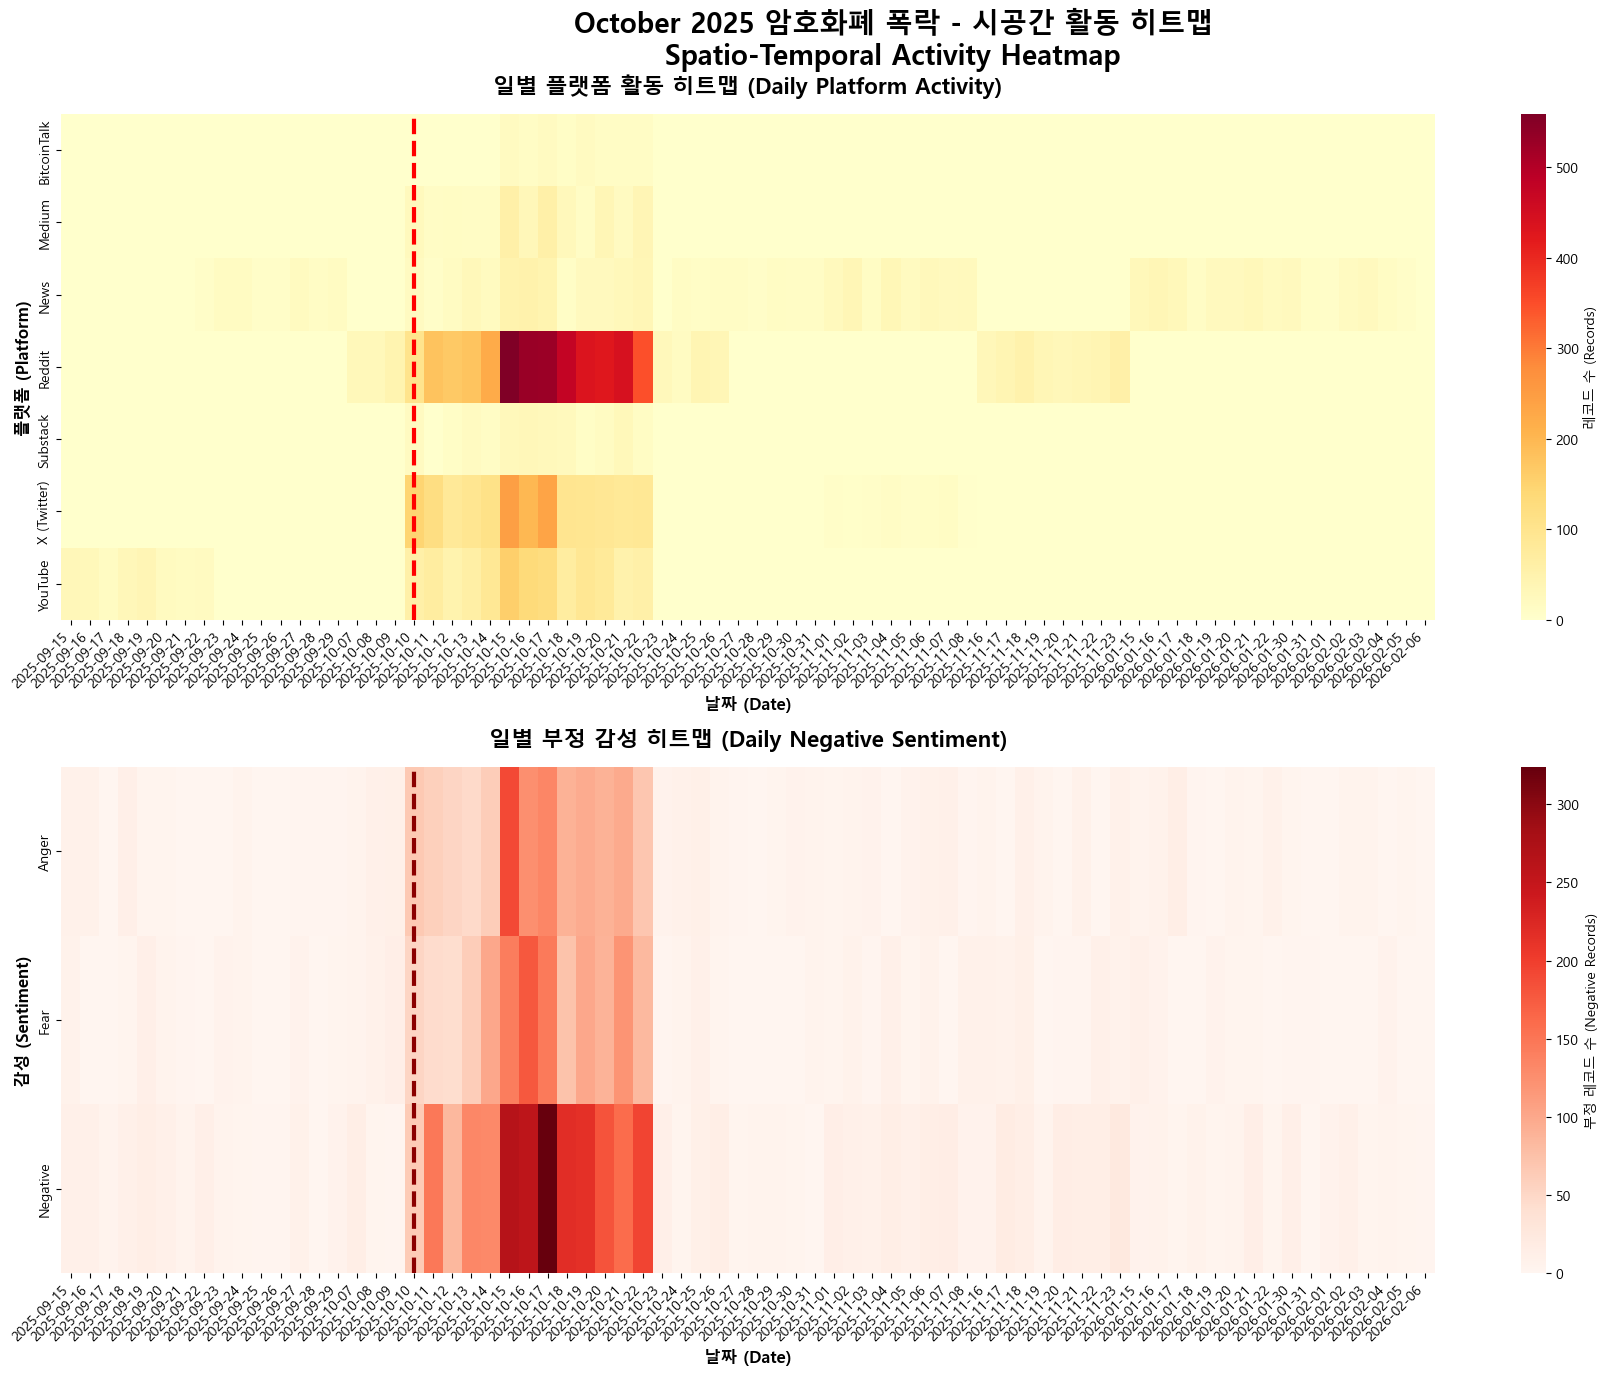

In [6]:
"""
시각화 5: 히트맵 - 날짜 x 플랫폼 x 감성
Visualization 5: Heatmap - Date x Platform x Sentiment
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 날짜 변환
df['date'] = pd.to_datetime(df['date_posted']).dt.date

# 부정 감성만 필터링 (Negative, Fear, Anger)
negative_sentiments = ['Negative', 'Fear', 'Anger']
df_negative = df[df['sentiment'].isin(negative_sentiments)]

# 날짜 x 플랫폼 피벗 테이블
date_platform_pivot = df.groupby(['date', 'platform']).size().unstack(fill_value=0)

# 날짜 x 감성 피벗 테이블 (부정 감성)
date_sentiment_pivot = df_negative.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(18, 14))
fig.suptitle('October 2025 암호화폐 폭락 - 시공간 활동 히트맵\nSpatio-Temporal Activity Heatmap', 
             fontsize=20, fontweight='bold')

# 1. 날짜 x 플랫폼 히트맵
sns.heatmap(date_platform_pivot.T, cmap='YlOrRd', annot=False, 
            fmt='d', cbar_kws={'label': '레코드 수 (Records)'}, ax=axes[0])
axes[0].set_title('일별 플랫폼 활동 히트맵 (Daily Platform Activity)', 
                  fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('날짜 (Date)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('플랫폼 (Platform)', fontsize=12, fontweight='bold')

# 폭락일 표시
crash_date = pd.to_datetime('2025-10-10').date()
if crash_date in date_platform_pivot.index:
    crash_idx = list(date_platform_pivot.index).index(crash_date)
    axes[0].axvline(crash_idx + 0.5, color='red', linewidth=3, linestyle='--')

# x축 레이블 회전
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# 2. 날짜 x 부정감성 히트맵
sns.heatmap(date_sentiment_pivot.T, cmap='Reds', annot=False,
            fmt='d', cbar_kws={'label': '부정 레코드 수 (Negative Records)'}, ax=axes[1])
axes[1].set_title('일별 부정 감성 히트맵 (Daily Negative Sentiment)', 
                  fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('날짜 (Date)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('감성 (Sentiment)', fontsize=12, fontweight='bold')

# 폭락일 표시
if crash_date in date_sentiment_pivot.index:
    crash_idx2 = list(date_sentiment_pivot.index).index(crash_date)
    axes[1].axvline(crash_idx2 + 0.5, color='darkred', linewidth=3, linestyle='--')

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_05_heatmap.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 플랫폼별 총 활동:")
print(date_platform_pivot.sum().sort_values(ascending=False))

print("\n📊 부정 감성 총계:")
print(date_sentiment_pivot.sum().sort_values(ascending=False))

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_06_author_type_analysis.png

📊 저자 유형별 감성 비율 (%):
sentiment        Analytical  Anger  Fear  Hopeful  Negative  Neutral  Positive
author_type                                                                   
Advocate                0.0   13.7  14.2     16.5      27.5     14.6      13.5
Analyst                 0.0   14.6  13.8     13.6      28.2     15.4      14.5
General User            0.0   14.3  18.1     13.5      28.3     11.4      14.4
Original Poster        19.9    8.4  12.6     18.8       8.4     31.9       0.0
Retail Trader           0.0   14.4  11.3     15.2      28.5     15.5      15.1
Skeptic                 0.0   15.6  15.5     13.1      30.2     11.1      14.6
Whale Tracker           0.0   14.4  14.7     11.8      29.7     15.4      14.1

📊 저자 유형별 평균 참여도:
author_type
Original Poster    41.63
Analyst            20.38
Skeptic            19.80
Retail Trader      19.79
Whale Tracker      19.59
Advocate           19.

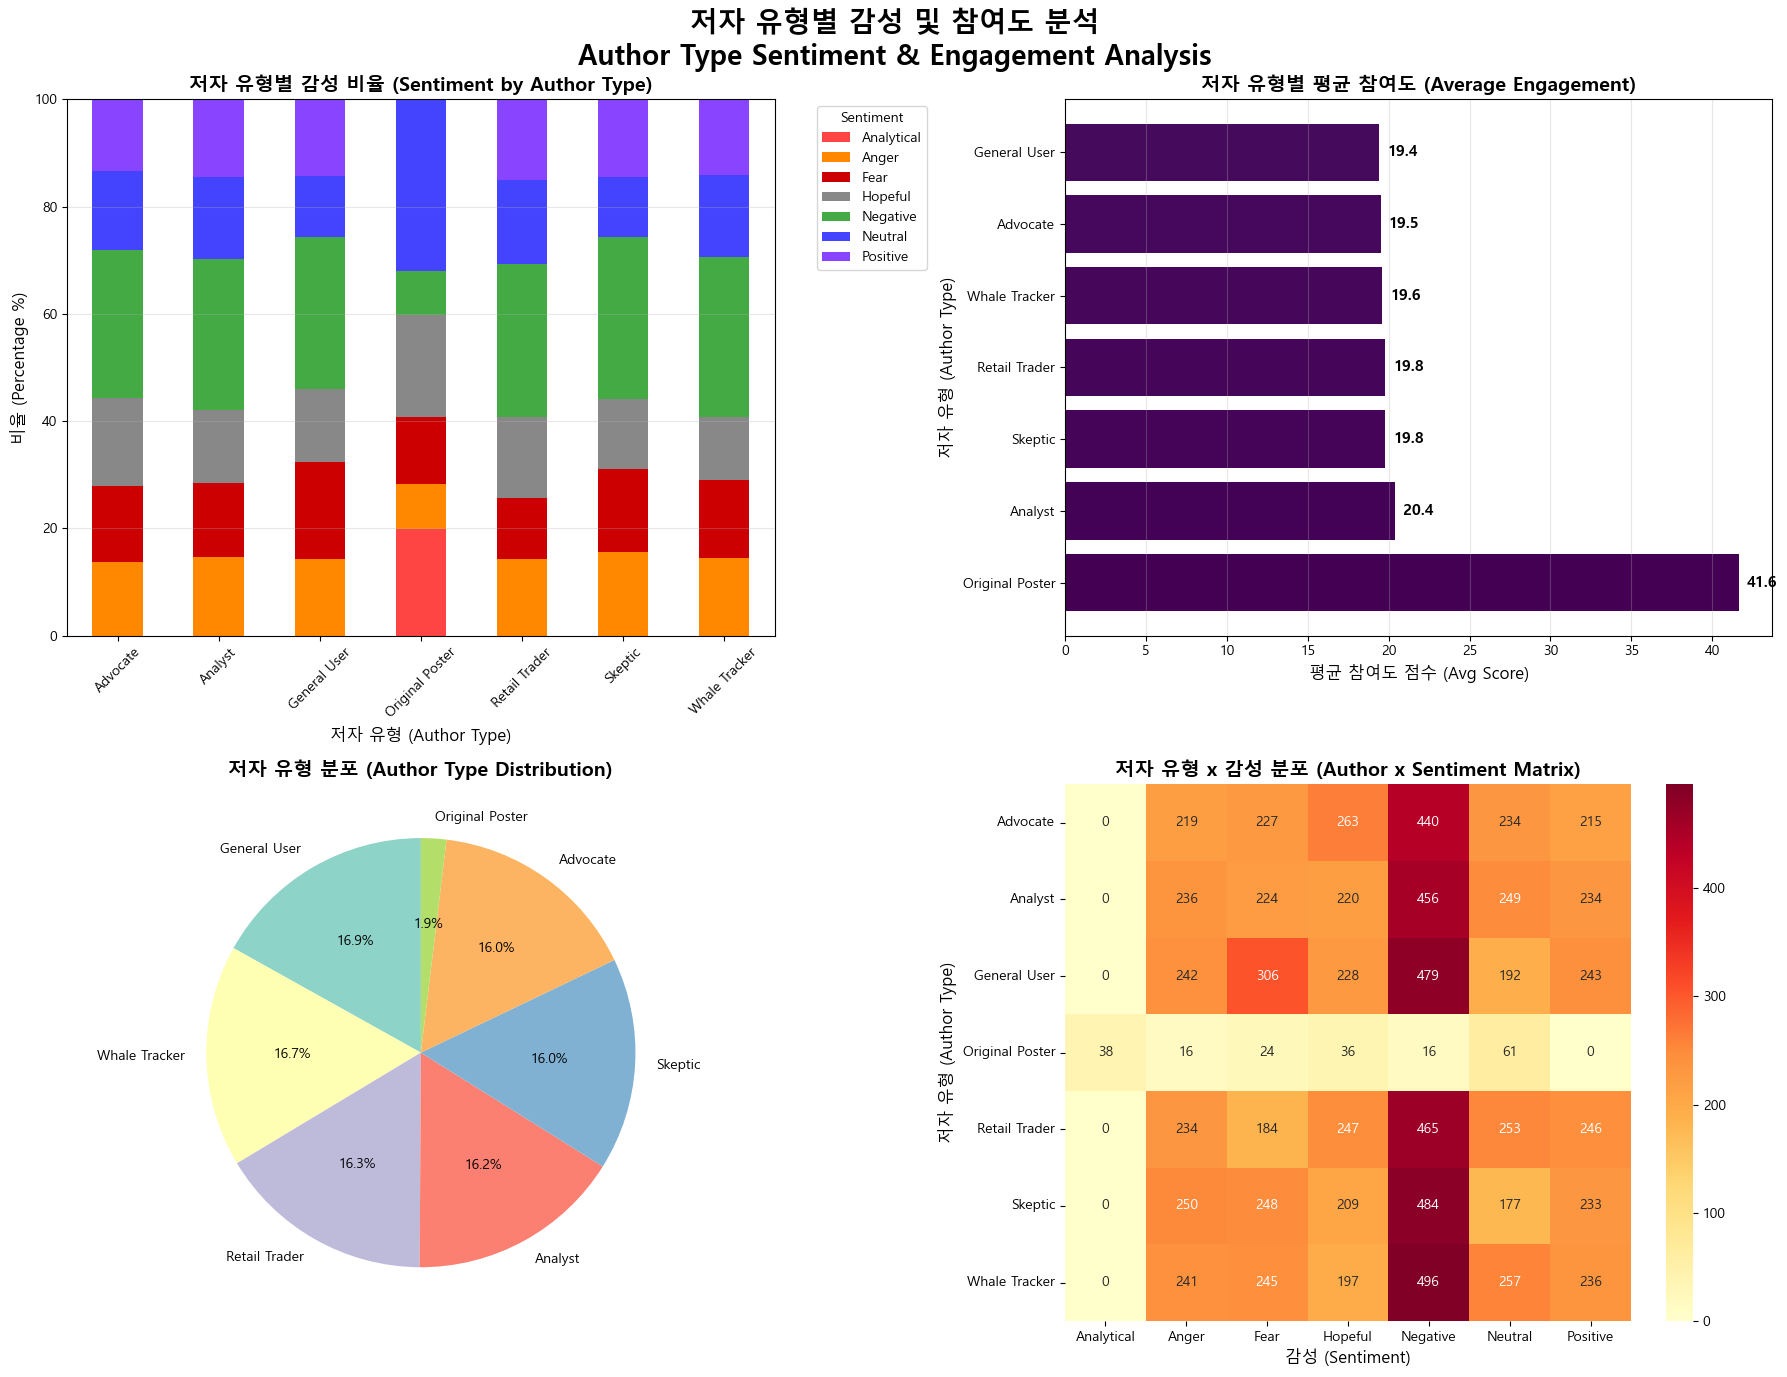

In [7]:
"""
시각화 6: 저자 유형별 감성 분석
Visualization 6: Author Type Sentiment Analysis
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 저자 유형별 감성 교차 분석
author_sentiment = pd.crosstab(df['author_type'], df['sentiment'], normalize='index') * 100

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('저자 유형별 감성 및 참여도 분석\nAuthor Type Sentiment & Engagement Analysis', 
             fontsize=20, fontweight='bold')

# 1. 저자 유형별 감성 비율 (Stacked Bar)
author_sentiment.plot(kind='bar', stacked=True, ax=axes[0, 0], 
                      color=['#FF4444', '#FF8800', '#CC0000', '#888888', '#44AA44', '#4444FF', '#8844FF'])
axes[0, 0].set_title('저자 유형별 감성 비율 (Sentiment by Author Type)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('저자 유형 (Author Type)', fontsize=12)
axes[0, 0].set_ylabel('비율 (Percentage %)', fontsize=12)
axes[0, 0].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. 저자 유형별 평균 참여도
author_engagement = df.groupby('author_type')['engagement_score'].mean().sort_values(ascending=False)
colors_eng = plt.cm.viridis(range(len(author_engagement)))

axes[0, 1].barh(author_engagement.index, author_engagement.values, color=colors_eng)
axes[0, 1].set_title('저자 유형별 평균 참여도 (Average Engagement)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('평균 참여도 점수 (Avg Score)', fontsize=12)
axes[0, 1].set_ylabel('저자 유형 (Author Type)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 값 표시
for i, v in enumerate(author_engagement.values):
    axes[0, 1].text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=11, fontweight='bold')

# 3. 저자 유형별 레코드 수
author_counts = df['author_type'].value_counts()
axes[1, 0].pie(author_counts, labels=author_counts.index, autopct='%1.1f%%',
              startangle=90, colors=plt.cm.Set3(range(len(author_counts))))
axes[1, 0].set_title('저자 유형 분포 (Author Type Distribution)', 
                     fontsize=14, fontweight='bold')

# 4. 히트맵 - 저자 유형 x 감성 (실제 개수)
author_sent_count = pd.crosstab(df['author_type'], df['sentiment'])
sns.heatmap(author_sent_count, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('저자 유형 x 감성 분포 (Author x Sentiment Matrix)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('감성 (Sentiment)', fontsize=12)
axes[1, 1].set_ylabel('저자 유형 (Author Type)', fontsize=12)

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_06_author_type_analysis.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 저자 유형별 감성 비율 (%):")
print(author_sentiment.round(1))

print("\n📊 저자 유형별 평균 참여도:")
print(author_engagement.round(2))

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_07_crash_timeline.png

📊 기간별 통계 비교:

폭락 전 (7일): 102개 레코드
폭락 당일: 369개 레코드
폭락 후 (7일): 4,751개 레코드

부정 감성 비율:
Before: 67.6% (69/102)
During: 49.9% (184/369)
After: 57.4% (2,729/4,751)


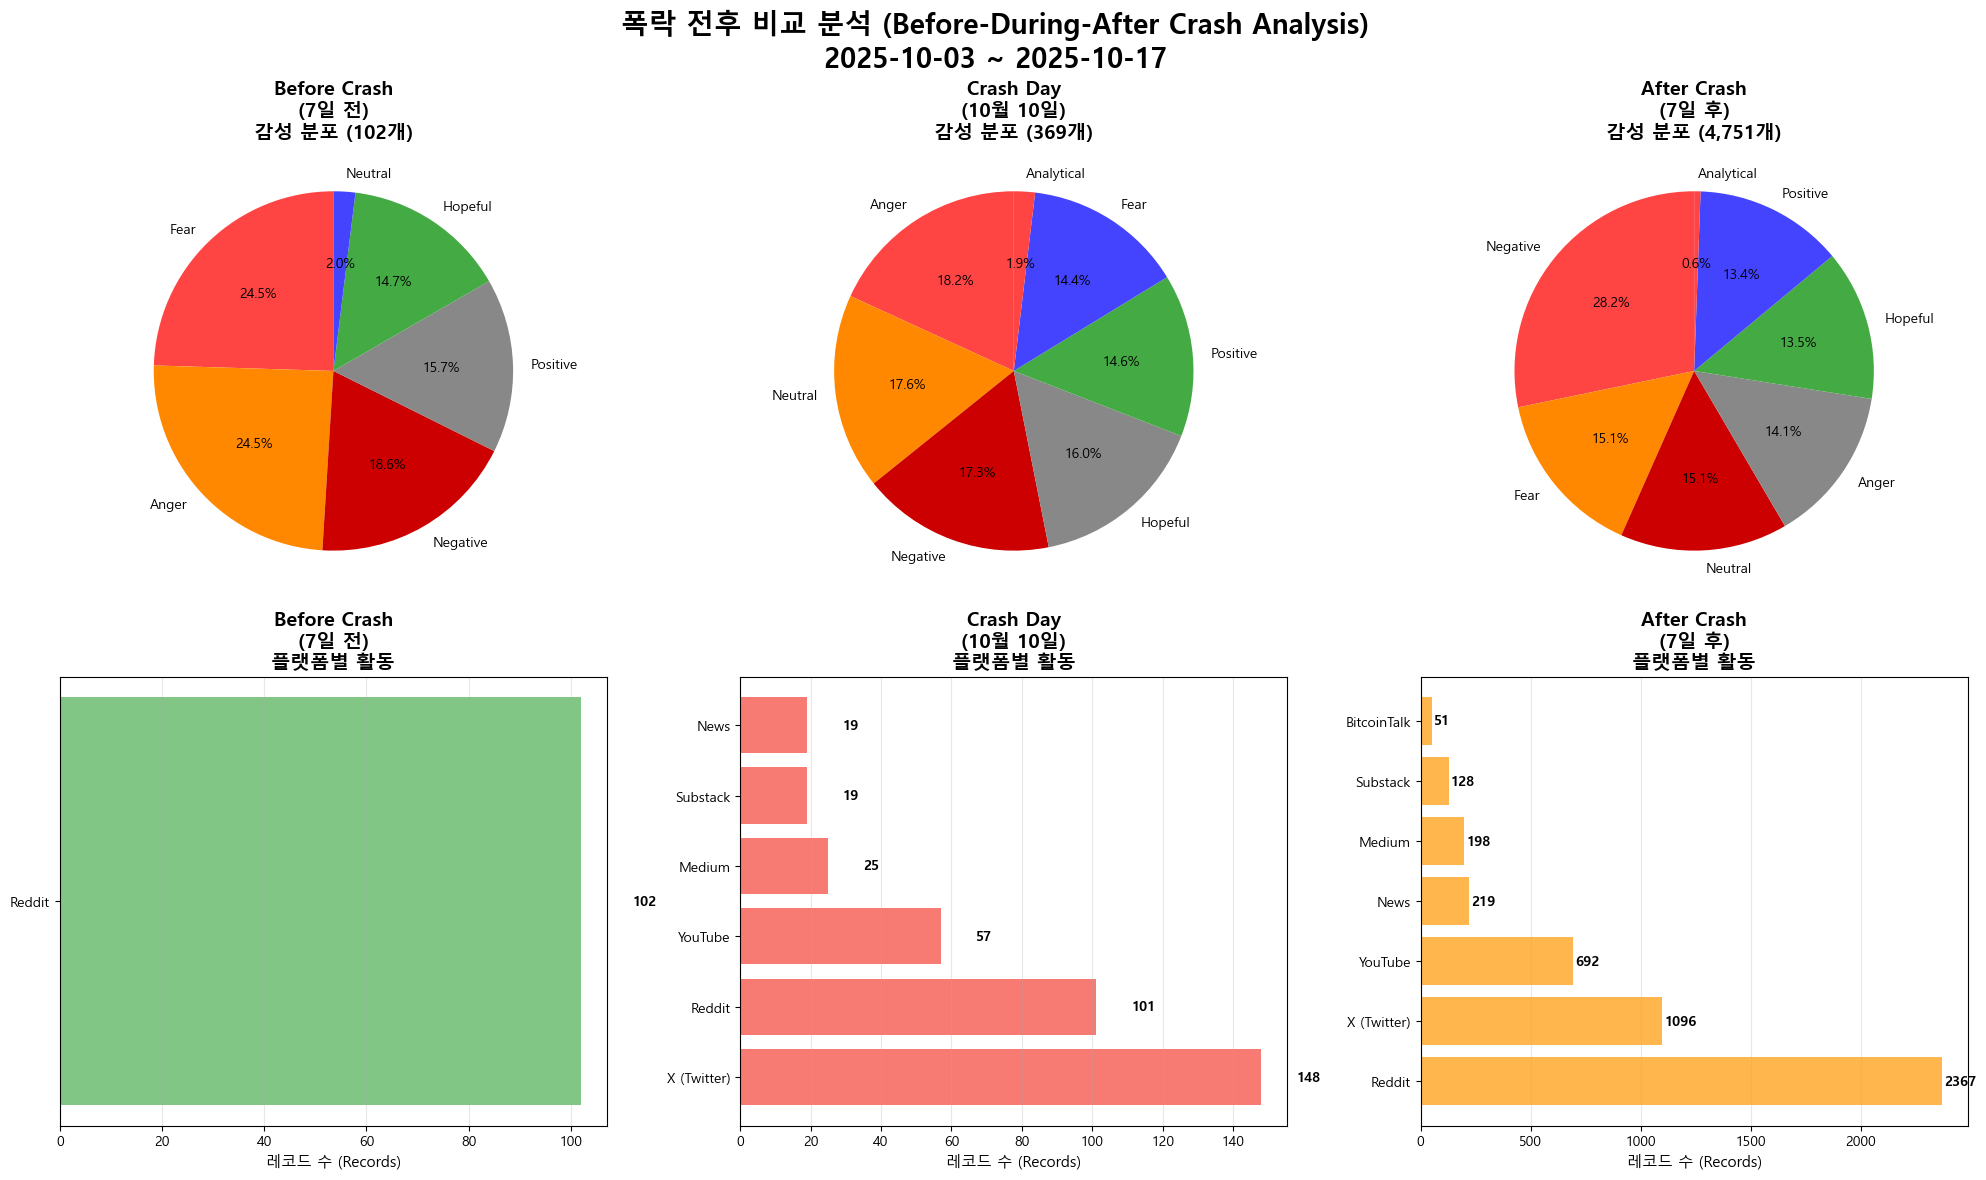

In [8]:
"""
시각화 7: 폭락 전후 시계열 비교 (Before-During-After)
Visualization 7: Crash Timeline Comparison
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 날짜 변환
df['date'] = pd.to_datetime(df['date_posted'])

# 폭락 전후 기간 정의
crash_date = pd.to_datetime('2025-10-10')
before_start = crash_date - pd.Timedelta(days=7)
after_end = crash_date + pd.Timedelta(days=7)

# 기간별 필터링
df_before = df[(df['date'] >= before_start) & (df['date'] < crash_date)]
df_during = df[df['date'].dt.date == crash_date.date()]
df_after = df[(df['date'] > crash_date) & (df['date'] <= after_end)]

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('폭락 전후 비교 분석 (Before-During-After Crash Analysis)\n2025-10-03 ~ 2025-10-17', 
             fontsize=20, fontweight='bold')

periods = [
    (df_before, 'Before Crash\n(7일 전)', '#4CAF50'),
    (df_during, 'Crash Day\n(10월 10일)', '#F44336'),
    (df_after, 'After Crash\n(7일 후)', '#FF9800')
]

# 1행: 감성 분포
for idx, (data, label, color) in enumerate(periods):
    if len(data) > 0:
        sentiment_dist = data['sentiment'].value_counts()
        axes[0, idx].pie(sentiment_dist, labels=sentiment_dist.index, autopct='%1.1f%%',
                        startangle=90, colors=['#FF4444', '#FF8800', '#CC0000', '#888888', '#44AA44', '#4444FF'])
        axes[0, idx].set_title(f'{label}\n감성 분포 ({len(data):,}개)', fontsize=14, fontweight='bold')
    else:
        axes[0, idx].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=14)

# 2행: 플랫폼별 활동
for idx, (data, label, color) in enumerate(periods):
    if len(data) > 0:
        platform_dist = data['platform'].value_counts()
        axes[1, idx].barh(platform_dist.index, platform_dist.values, color=color, alpha=0.7)
        axes[1, idx].set_title(f'{label}\n플랫폼별 활동', fontsize=14, fontweight='bold')
        axes[1, idx].set_xlabel('레코드 수 (Records)', fontsize=11)
        axes[1, idx].grid(True, alpha=0.3, axis='x')
        
        # 값 표시
        for i, v in enumerate(platform_dist.values):
            axes[1, idx].text(v + 10, i, str(v), va='center', fontsize=10, fontweight='bold')
    else:
        axes[1, idx].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=14)

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_07_crash_timeline.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 비교
print("\n📊 기간별 통계 비교:")
print(f"\n폭락 전 (7일): {len(df_before):,}개 레코드")
print(f"폭락 당일: {len(df_during):,}개 레코드")
print(f"폭락 후 (7일): {len(df_after):,}개 레코드")

print("\n부정 감성 비율:")
for data, label in [(df_before, 'Before'), (df_during, 'During'), (df_after, 'After')]:
    if len(data) > 0:
        negative = len(data[data['sentiment'].isin(['Negative', 'Fear', 'Anger'])])
        pct = (negative / len(data)) * 100
        print(f"{label}: {pct:.1f}% ({negative:,}/{len(data):,})")

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_08_engagement_relevance.png

📊 4분면 분포:
quadrant
High-High           2527
Low Rel-High Eng    2517
Low-Low             2483
High Rel-Low Eng    2473
Name: count, dtype: int64

중간값 (Median):
  관련성: 80.5
  참여도: 19.0

High-High 레코드: 2,527개
  평균 관련성: 91.1
  평균 참여도: 31.3


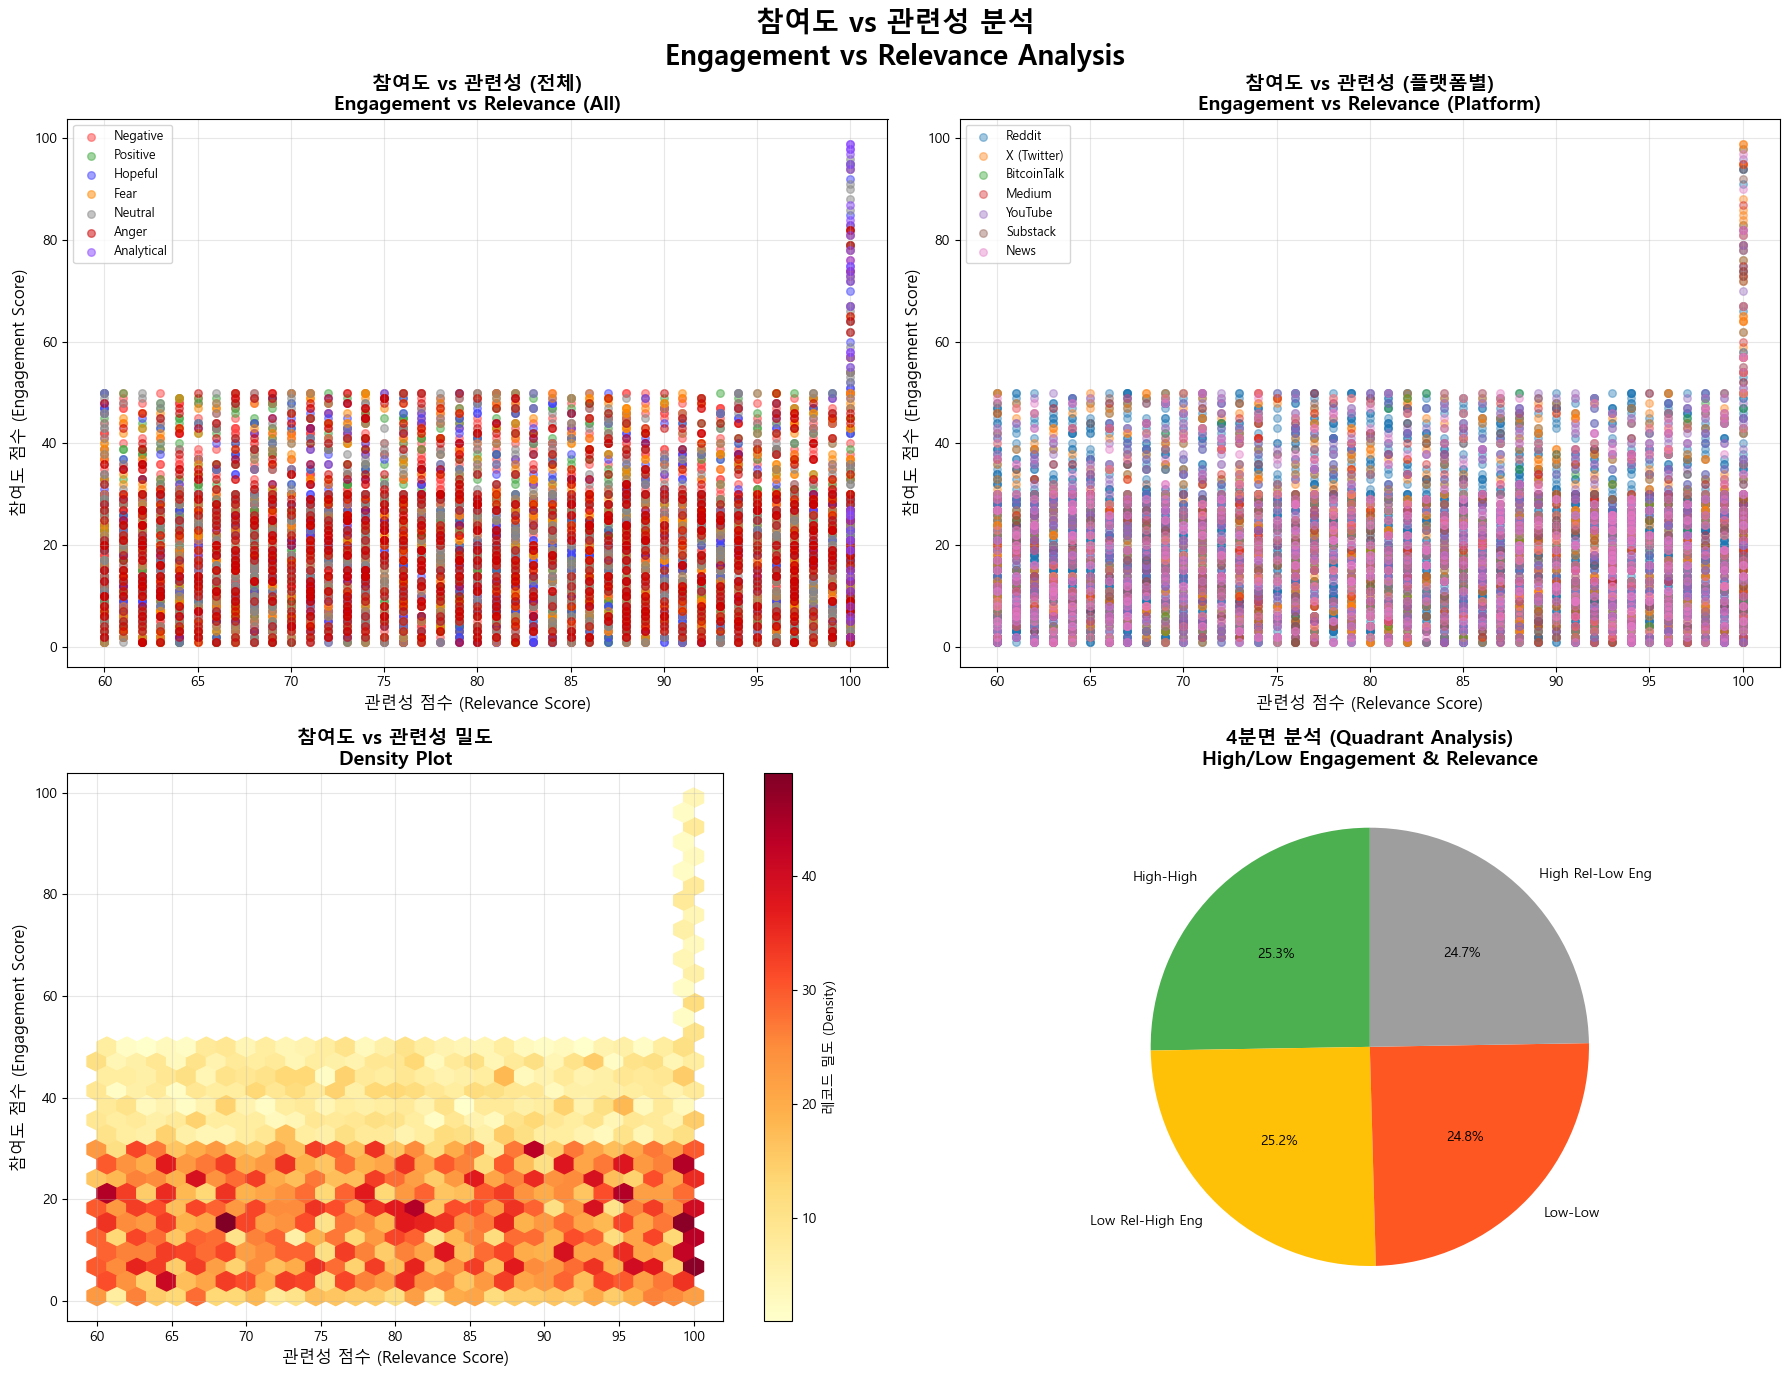

In [9]:
"""
시각화 8: 참여도 vs 관련성 산점도 분석
Visualization 8: Engagement vs Relevance Scatter Analysis
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('참여도 vs 관련성 분석\nEngagement vs Relevance Analysis', 
             fontsize=20, fontweight='bold')

# 색상 매핑
sentiment_colors = {
    'Negative': '#FF4444',
    'Fear': '#FF8800',
    'Anger': '#CC0000',
    'Neutral': '#888888',
    'Positive': '#44AA44',
    'Hopeful': '#4444FF',
    'Analytical': '#8844FF'
}

# 1. 전체 산점도 (감성별 색상)
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    axes[0, 0].scatter(subset['relevance_score'], subset['engagement_score'],
                      alpha=0.5, s=30, c=sentiment_colors.get(sentiment, '#CCCCCC'),
                      label=sentiment)

axes[0, 0].set_title('참여도 vs 관련성 (전체)\nEngagement vs Relevance (All)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('관련성 점수 (Relevance Score)', fontsize=12)
axes[0, 0].set_ylabel('참여도 점수 (Engagement Score)', fontsize=12)
axes[0, 0].legend(loc='best', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# 2. 플랫폼별 산점도
for platform in df['platform'].unique()[:7]:  # 상위 7개
    subset = df[df['platform'] == platform]
    axes[0, 1].scatter(subset['relevance_score'], subset['engagement_score'],
                      alpha=0.4, s=30, label=platform)

axes[0, 1].set_title('참여도 vs 관련성 (플랫폼별)\nEngagement vs Relevance (Platform)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('관련성 점수 (Relevance Score)', fontsize=12)
axes[0, 1].set_ylabel('참여도 점수 (Engagement Score)', fontsize=12)
axes[0, 1].legend(loc='best', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. 밀도 플롯 (Hexbin)
hexbin = axes[1, 0].hexbin(df['relevance_score'], df['engagement_score'],
                          gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1, 0].set_title('참여도 vs 관련성 밀도\nDensity Plot', 
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('관련성 점수 (Relevance Score)', fontsize=12)
axes[1, 0].set_ylabel('참여도 점수 (Engagement Score)', fontsize=12)
plt.colorbar(hexbin, ax=axes[1, 0], label='레코드 밀도 (Density)')
axes[1, 0].grid(True, alpha=0.3)

# 4. 4분면 분석
median_relevance = df['relevance_score'].median()
median_engagement = df['engagement_score'].median()

# 4분면 정의
df['quadrant'] = 'Low-Low'
df.loc[(df['relevance_score'] >= median_relevance) & (df['engagement_score'] >= median_engagement), 'quadrant'] = 'High-High'
df.loc[(df['relevance_score'] >= median_relevance) & (df['engagement_score'] < median_engagement), 'quadrant'] = 'High Rel-Low Eng'
df.loc[(df['relevance_score'] < median_relevance) & (df['engagement_score'] >= median_engagement), 'quadrant'] = 'Low Rel-High Eng'

quadrant_counts = df['quadrant'].value_counts()
colors_quad = ['#4CAF50', '#FFC107', '#FF5722', '#9E9E9E']

axes[1, 1].pie(quadrant_counts, labels=quadrant_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors_quad)
axes[1, 1].set_title('4분면 분석 (Quadrant Analysis)\nHigh/Low Engagement & Relevance', 
                     fontsize=14, fontweight='bold')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_08_engagement_relevance.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 4분면 분포:")
print(quadrant_counts)

print(f"\n중간값 (Median):")
print(f"  관련성: {median_relevance:.1f}")
print(f"  참여도: {median_engagement:.1f}")

# High-High 샘플
high_high = df[df['quadrant'] == 'High-High']
print(f"\nHigh-High 레코드: {len(high_high):,}개")
print(f"  평균 관련성: {high_high['relevance_score'].mean():.1f}")
print(f"  평균 참여도: {high_high['engagement_score'].mean():.1f}")

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_09_keyword_frequency.png

📊 Top 20 키워드:
 1. crypto                   :  5,287회
 2. bitcoin                  :  5,287회
 3. market                   :  5,287회
 4. October 2025             :  5,287회
 5. crash                    :  2,121회
 6. dump                     :  2,121회
 7. selloff                  :  2,121회
 8. bloodbath                :  2,121회
 9. panic                    :  2,121회
10. manipulation             :  1,081회
11. liquidation              :    863회
12. leverage                 :    863회
13. margin call              :    863회
14. rekt                     :    863회
15. whale                    :    670회
16. large holder             :    670회
17. insider                  :    670회
18. coordinated              :    411회
19. suspicious               :    411회
20. timing                   :    411회

📊 카테고리별 합계:
폭락/청산
(Crash)                 : 12,331회
암호화폐
(Crypto)                 : 10,574회
조작의혹
(Manipulation)     

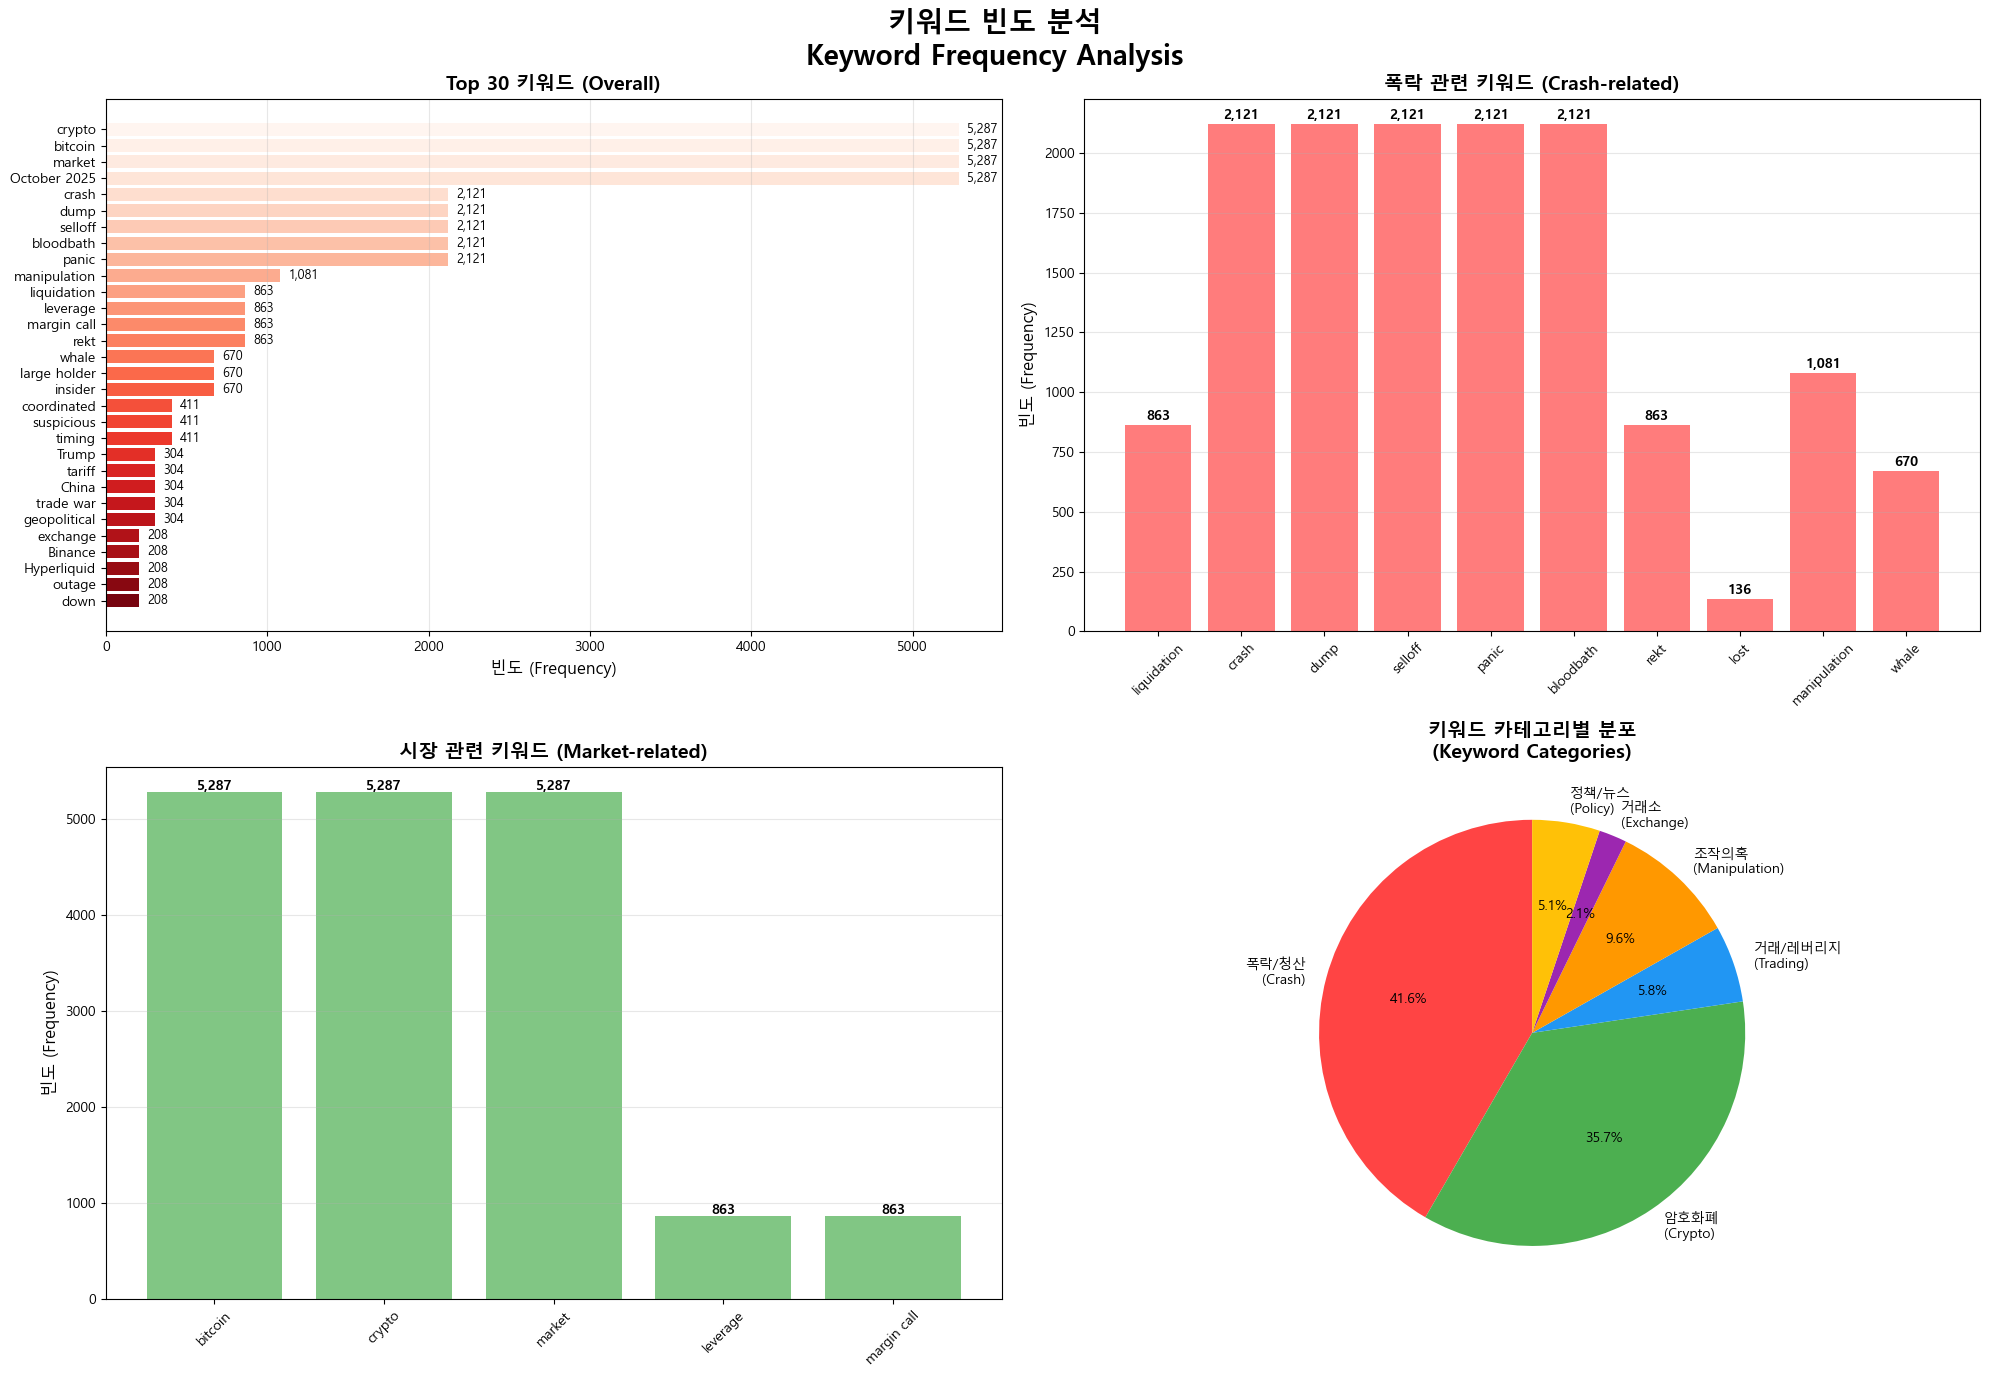

In [10]:
"""
시각화 9: 키워드 빈도 막대 그래프 (Top 30)
Visualization 9: Top Keywords Bar Chart
"""

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 키워드 추출
all_keywords = []
for keywords_str in df['keywords'].dropna():
    keywords = keywords_str.split(',')
    all_keywords.extend([k.strip() for k in keywords])

keyword_counts = Counter(all_keywords)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('키워드 빈도 분석\nKeyword Frequency Analysis', 
             fontsize=20, fontweight='bold')

# 1. Top 30 전체 키워드
top_30 = dict(keyword_counts.most_common(30))
colors = plt.cm.Reds([(i/30) for i in range(30)])

axes[0, 0].barh(list(top_30.keys())[::-1], list(top_30.values())[::-1], color=colors[::-1])
axes[0, 0].set_title('Top 30 키워드 (Overall)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('빈도 (Frequency)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 값 표시
for i, (keyword, count) in enumerate(list(top_30.items())[::-1]):
    axes[0, 0].text(count + 50, i, f'{count:,}', va='center', fontsize=9)

# 2. 폭락 관련 키워드만
crash_keywords = ['liquidation', 'crash', 'dump', 'selloff', 'panic', 'bloodbath', 
                  'rekt', 'lost', 'manipulation', 'whale']
crash_counts = {k: keyword_counts[k] for k in crash_keywords if k in keyword_counts}

axes[0, 1].bar(crash_counts.keys(), crash_counts.values(), color='#FF4444', alpha=0.7)
axes[0, 1].set_title('폭락 관련 키워드 (Crash-related)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('빈도 (Frequency)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 값 표시
for keyword, count in crash_counts.items():
    axes[0, 1].text(keyword, count + 20, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# 3. 시장 관련 키워드
market_keywords = ['bitcoin', 'BTC', 'crypto', 'market', 'ethereum', 'ETH', 
                   'leverage', 'margin call', 'futures', 'derivatives']
market_counts = {k: keyword_counts[k] for k in market_keywords if k in keyword_counts}

axes[1, 0].bar(market_counts.keys(), market_counts.values(), color='#4CAF50', alpha=0.7)
axes[1, 0].set_title('시장 관련 키워드 (Market-related)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('빈도 (Frequency)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 값 표시
for keyword, count in market_counts.items():
    axes[1, 0].text(keyword, count + 20, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# 4. 키워드 카테고리별 합계
categories = {
    '폭락/청산\n(Crash)': ['liquidation', 'crash', 'dump', 'selloff', 'panic', 'bloodbath', 'rekt'],
    '암호화폐\n(Crypto)': ['bitcoin', 'BTC', 'crypto', 'ethereum', 'ETH', 'altcoin'],
    '거래/레버리지\n(Trading)': ['leverage', 'margin call', 'futures', 'derivatives', 'trading'],
    '조작의혹\n(Manipulation)': ['manipulation', 'whale', 'insider', 'coordinated'],
    '거래소\n(Exchange)': ['exchange', 'Binance', 'Hyperliquid', 'Bybit'],
    '정책/뉴스\n(Policy)': ['Trump', 'tariff', 'China', 'trade war', 'geopolitical']
}

category_totals = {}
for cat, keywords in categories.items():
    total = sum(keyword_counts.get(k, 0) for k in keywords)
    category_totals[cat] = total

colors_cat = ['#FF4444', '#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#FFC107']
axes[1, 1].pie(category_totals.values(), labels=category_totals.keys(), 
              autopct='%1.1f%%', startangle=90, colors=colors_cat)
axes[1, 1].set_title('키워드 카테고리별 분포\n(Keyword Categories)', fontsize=14, fontweight='bold')

plt.tight_layout()

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_09_keyword_frequency.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

# 통계 출력
print("\n📊 Top 20 키워드:")
for i, (keyword, count) in enumerate(keyword_counts.most_common(20), 1):
    print(f"{i:2d}. {keyword:25s}: {count:6,}회")

print("\n📊 카테고리별 합계:")
for cat, total in sorted(category_totals.items(), key=lambda x: x[1], reverse=True):
    print(f"{cat:30s}: {total:6,}회")

plt.show()


✅ 저장 완료: C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_10_comprehensive_dashboard.png

📊 종합 대시보드 생성 완료!

총 레코드: 10,000개
분석 기간: 2025-09-15 ~ 2026-02-06
부정 감성: 57.3%

가장 활발한 날: 2025-10-15 (1,118개 레코드)
가장 활발한 플랫폼: Reddit (5,145개)


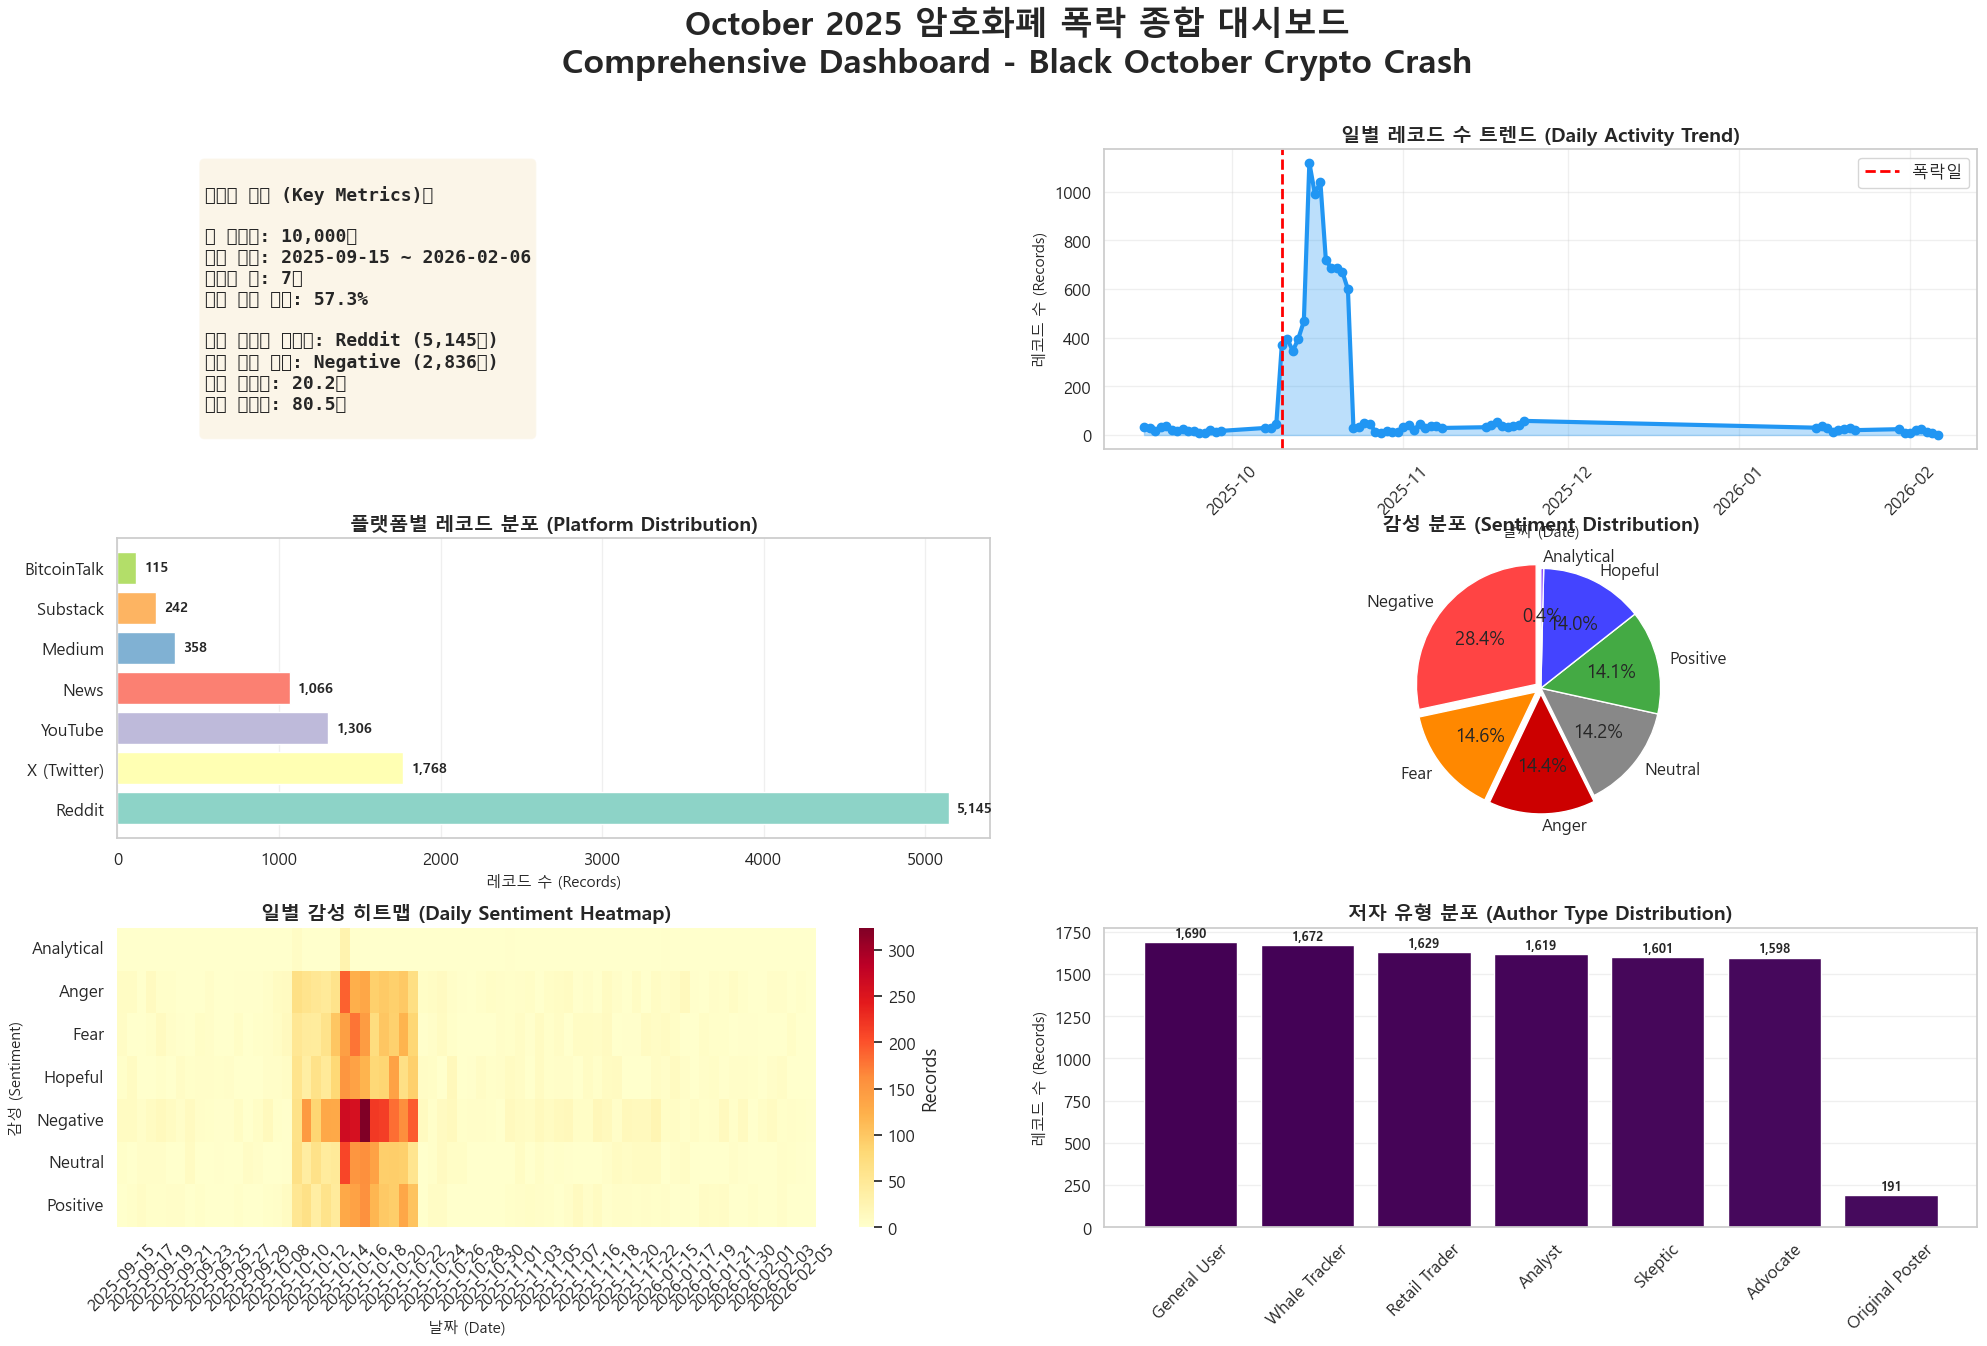

In [13]:
"""
시각화 10: 종합 대시보드 - 핵심 인사이트
Visualization 10: Comprehensive Dashboard
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\FINAL_10K_RECORDS.csv'
df = pd.read_csv(data_path)

# 날짜 변환
df['date'] = pd.to_datetime(df['date_posted']).dt.date

# Figure 생성
fig = plt.figure(figsize=(24, 14))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

fig.suptitle('October 2025 암호화폐 폭락 종합 대시보드\nComprehensive Dashboard - Black October Crypto Crash', 
             fontsize=24, fontweight='bold', y=0.98)

# 1. KPI 박스 (좌상단)
ax1 = fig.add_subplot(gs[0, :2])
ax1.axis('off')

total_records = len(df)
total_platforms = df['platform'].nunique()
date_range = f"{df['date'].min()} ~ {df['date'].max()}"
negative_pct = (len(df[df['sentiment'].isin(['Negative', 'Fear', 'Anger'])]) / total_records) * 100

kpi_text = f"""
【핵심 지표 (Key Metrics)】

총 레코드: {total_records:,}개
분석 기간: {date_range}
플랫폼 수: {total_platforms}개
부정 감성 비율: {negative_pct:.1f}%

가장 활발한 플랫폼: {df['platform'].value_counts().index[0]} ({df['platform'].value_counts().iloc[0]:,}개)
가장 많은 감성: {df['sentiment'].value_counts().index[0]} ({df['sentiment'].value_counts().iloc[0]:,}개)
평균 참여도: {df['engagement_score'].mean():.1f}점
평균 관련성: {df['relevance_score'].mean():.1f}점
"""

ax1.text(0.1, 0.5, kpi_text, fontsize=13, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
        family='monospace', fontweight='bold')

# 2. 일별 트렌드 (우상단)
ax2 = fig.add_subplot(gs[0, 2:])
daily_counts = df.groupby('date').size()
ax2.plot(daily_counts.index, daily_counts.values, linewidth=3, color='#2196F3', marker='o')
ax2.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='#2196F3')

crash_date = pd.to_datetime('2025-10-10').date()
ax2.axvline(crash_date, color='red', linestyle='--', linewidth=2, label='폭락일')

ax2.set_title('일별 레코드 수 트렌드 (Daily Activity Trend)', fontsize=14, fontweight='bold')
ax2.set_xlabel('날짜 (Date)', fontsize=11)
ax2.set_ylabel('레코드 수 (Records)', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. 플랫폼 분포 (중좌)
ax3 = fig.add_subplot(gs[1, :2])
platform_counts = df['platform'].value_counts()
colors_plat = plt.cm.Set3(range(len(platform_counts)))
ax3.barh(platform_counts.index, platform_counts.values, color=colors_plat)
ax3.set_title('플랫폼별 레코드 분포 (Platform Distribution)', fontsize=14, fontweight='bold')
ax3.set_xlabel('레코드 수 (Records)', fontsize=11)
ax3.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(platform_counts.values):
    ax3.text(v + 50, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

# 4. 감성 파이 (중우)
ax4 = fig.add_subplot(gs[1, 2:])
sentiment_counts = df['sentiment'].value_counts()
colors_sent = ['#FF4444', '#FF8800', '#CC0000', '#888888', '#44AA44', '#4444FF', '#8844FF']
explode = [0.05 if s in ['Negative', 'Fear', 'Anger'] else 0 for s in sentiment_counts.index]

ax4.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
       colors=colors_sent[:len(sentiment_counts)], explode=explode, startangle=90)
ax4.set_title('감성 분포 (Sentiment Distribution)', fontsize=14, fontweight='bold')

# 5. 히트맵 (하단 좌)
ax5 = fig.add_subplot(gs[2, :2])
date_sentiment = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)
sns.heatmap(date_sentiment.T, cmap='YlOrRd', ax=ax5, cbar_kws={'label': 'Records'})
ax5.set_title('일별 감성 히트맵 (Daily Sentiment Heatmap)', fontsize=14, fontweight='bold')
ax5.set_xlabel('날짜 (Date)', fontsize=11)
ax5.set_ylabel('감성 (Sentiment)', fontsize=11)
ax5.tick_params(axis='x', rotation=45)

# 6. 저자 유형 (하단 우)
ax6 = fig.add_subplot(gs[2, 2:])
author_counts = df['author_type'].value_counts()
ax6.bar(author_counts.index, author_counts.values, color=plt.cm.viridis(range(len(author_counts))))
ax6.set_title('저자 유형 분포 (Author Type Distribution)', fontsize=14, fontweight='bold')
ax6.set_ylabel('레코드 수 (Records)', fontsize=11)
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3, axis='y')

for i, (idx, val) in enumerate(author_counts.items()):
    ax6.text(i, val + 30, f'{val:,}', ha='center', fontsize=9, fontweight='bold')

# 저장
output_path = r'C:\junwoo\AI_Project_01_Team6\data\Community_data\viz_10_comprehensive_dashboard.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {output_path}")

print("\n" + "="*80)
print("📊 종합 대시보드 생성 완료!")
print("="*80)
print(f"\n총 레코드: {total_records:,}개")
print(f"분석 기간: {date_range}")
print(f"부정 감성: {negative_pct:.1f}%")
print(f"\n가장 활발한 날: {daily_counts.idxmax()} ({daily_counts.max():,}개 레코드)")
print(f"가장 활발한 플랫폼: {platform_counts.index[0]} ({platform_counts.iloc[0]:,}개)")

plt.show()
